In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Dataset.csv', sep=';')

# Display the first 5 rows of the DataFrame
print("First 5 rows of the dataset:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Display concise summary of the DataFrame, including data types and non-null values
print("\nDataset Info:")
df.info()

# Display the number of rows and columns
print(f"\nDataset shape: {df.shape[0]} rows, {df.shape[1]} columns")

First 5 rows of the dataset:
| age   | job          | marital   | education   | default   | balance   | housing   | loan   | contact   | day   | month   | duration   | campaign   | pdays   | previous   | poutcome   | y   |
|:------|:-------------|:----------|:------------|:----------|:----------|:----------|:-------|:----------|:------|:--------|:-----------|:-----------|:--------|:-----------|:-----------|:----|
| 58    | management   | married   | tertiary    | no        | 2143      | yes       | no     | unknown   | 5     | may     | 261        | 1          | -1      | 0          | unknown    | no  |
| 44    | technician   | single    | secondary   | no        | 29        | yes       | no     | unknown   | 5     | may     | 151        | 1          | -1      | 0          | unknown    | no  |
| 33    | entrepreneur | married   | secondary   | no        | 2         | yes       | yes    | unknown   | 5     | may     | 76         | 1          | -1      | 0          | unknown    | no  |
|

Observation:

1.Dataset Size: The dataset bank-full.csv consists of 45,211 rows and 17 columns. This provides a substantial amount of data for analysis.

2.No Explicit Missing Values: The df.info() output shows that all 17 columns have 45,211 non-null entries, meaning there are no standard missing values (like NaN) present. This is a good starting point, as it reduces the need for immediate imputation of explicit missing data.

3.Data Types:
Numerical Columns (7): age, balance, day, duration, campaign, pdays, previous are all of int64 type.

Categorical Columns (10): job, marital, education, default, housing, loan, contact, month, poutcome, and y are all of object (string) type.

Implicit Missing Values ("unknown", -1): Although there are no explicit NaN values, the head() output reveals that some categorical columns (e.g., job, education, contact, poutcome) contain the string 'unknown'. Similarly, the pdays numerical column contains -1. These values often represent implicitly missing or non-applicable information and will need specific handling during the preprocessing phase.

Target Variable: The y column, representing "has the client subscribed a term deposit?", is a categorical variable, indicating that this dataset is likely intended for a binary classification task.



In [ ]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Analyze Numerical Columns: Descriptive Statistics
print("\n--- Descriptive Statistics for Numerical Columns ---")
print(df[numerical_cols].describe().to_markdown(numalign="left", stralign="left"))

# Analyze Categorical Columns: Unique Values and Counts
print("\n--- Unique Values and Counts for Categorical Columns ---")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().to_markdown(numalign="left", stralign="left"))



--- Descriptive Statistics for Numerical Columns ---
|       | age     | balance   | day     | duration   | campaign   | pdays   | previous   |
|:------|:--------|:----------|:--------|:-----------|:-----------|:--------|:-----------|
| count | 45211   | 45211     | 45211   | 45211      | 45211      | 45211   | 45211      |
| mean  | 40.9362 | 1362.27   | 15.8064 | 258.163    | 2.76384    | 40.1978 | 0.580323   |
| std   | 10.6188 | 3044.77   | 8.32248 | 257.528    | 3.09802    | 100.129 | 2.30344    |
| min   | 18      | -8019     | 1       | 0          | 1          | -1      | 0          |
| 25%   | 33      | 72        | 8       | 103        | 1          | -1      | 0          |
| 50%   | 39      | 448       | 16      | 180        | 2          | -1      | 0          |
| 75%   | 48      | 1428      | 21      | 319        | 3          | -1      | 0          |
| max   | 95      | 102127    | 31      | 4918       | 63         | 871     | 275        |

--- Unique Values and Counts for Ca

**Observation:**

Numerical Columns (age, balance, day, duration, campaign, pdays, previous):

age: The age of clients ranges from 18 to 95, with an average of approximately 41 years. The spread (standard deviation of ~10.6) suggests a diverse age group.

balance: This column shows a very wide range, from a minimum of -8019 (indicating overdrafts or debts) to a maximum of 102,127. The large standard deviation (3044.77) and the significant difference between the mean (1362.27) and median (448) suggest that the balance distribution is highly right-skewed and contains a large number of outliers, particularly on the higher end. This will likely require scaling or transformation (e.g., log transformation after handling negative values) for many machine learning models.

day: This feature represents the day of the month the client was last contacted (1 to 31). It's an integer but fundamentally categorical or cyclical in nature, which might be better handled with appropriate encoding rather than treated purely numerically.

duration: The call duration ranges from 0 to 4918 seconds (about 82 minutes), with an average of 258 seconds (~4.3 minutes). A minimum of 0 seconds implies calls that were either very brief or perhaps not truly connected. Crucially, the duration feature introduces data leakage for predictive modeling. In a real-world scenario, you wouldn't know the call duration before deciding whether a client will subscribe. If duration is 0, the subscription (y) is always 'no'. Including duration in a predictive model would lead to unrealistically high performance on historical data, but the model would perform poorly in deployment. Therefore, it's generally recommended to drop this column for models aiming to predict outcomes before a call.

campaign: The number of contacts performed during the current campaign for the client ranges from 1 to 63, with an average of about 3 contacts. The high maximum value suggests some clients were contacted many times, which could indicate persistence or difficulty in reaching them.

pdays: This feature indicates the number of days since the client was last contacted from a previous campaign. Its values range from -1 to 871. The significant presence of -1 (75th percentile is -1) indicates that a large majority of clients (around 75%) were either not previously contacted or the information is unavailable. This -1 is a special sentinel value and should not be treated as a numerical value in its current form. It's often better to convert this into a binary indicator (e.g., was_contacted_before) and treat the remaining pdays values (for those who were contacted) as numerical.

previous: The number of contacts performed before this campaign ranges from 0 to 275. Similar to campaign and pdays, the high maximum value compared to the mean (0.58) suggests a highly skewed distribution with many zeros and a few large values.

Categorical Columns (job, marital, education, default, housing, loan, contact, month, poutcome, y):

job: Contains 12 distinct job types. There are 288 instances where the job is 'unknown'. The most common jobs are 'blue-collar', 'management', and 'technician'.

marital: Contains 3 categories: 'married', 'single', and 'divorced'. No 'unknown' values. 'married' is the most frequent status.

education: Contains 4 categories: 'secondary', 'tertiary', 'primary', and 'unknown'. There are 1,857 'unknown' education levels. 'secondary' education is the most prevalent.

default: This is a binary feature ('yes'/'no') indicating if the client has credit in default. It is highly imbalanced, with only 815 clients having a 'yes' (about 1.8% of the data). This imbalance might be a concern if default were a target variable, but here it's a feature.

housing: A binary feature ('yes'/'no') indicating if the client has a housing loan. Fairly balanced.

loan: A binary feature ('yes'/'no') indicating if the client has a personal loan. 'no' is significantly more common than 'yes'.

contact: Contains 3 categories: 'cellular', 'unknown', and 'telephone'. A very large proportion (13,020 counts, or almost 30%) of the contact method is 'unknown'. This is a significant missing information that needs careful consideration.

month: Contains 12 distinct months. 'May' is the most frequent month for contacts, indicating potential seasonal patterns in campaign efforts.

poutcome: Represents the outcome of the previous marketing campaign. It has 4 categories: 'unknown', 'failure', 'other', and 'success'. A massive proportion (36,959 counts, or over 81%) of the poutcome values are 'unknown', meaning the outcome of previous campaigns is largely unrecorded for most clients.

y (Target Variable): This is the target variable ('yes'/'no'), indicating whether the client subscribed to a term deposit. It is highly imbalanced: 39,922 'no' (88.3%) versus 5,289 'yes' (11.7%). This class imbalance is critical for a classification task and will need to be addressed during model training (e.g., through oversampling, undersampling, or using specific loss functions/metrics) to ensure the model doesn't just predict the majority class.

In [ ]:
import numpy as np

# 1. Handle 'pdays' column
# Create a new binary feature 'pdays_contacted': 1 if client was contacted previously, 0 otherwise
df['pdays_contacted'] = np.where(df['pdays'] == -1, 0, 1)
# Replace -1 in 'pdays' with 0. This makes 'pdays' represent days since *any* contact or 0 if never contacted.
df['pdays'] = df['pdays'].replace(-1, 0)

# 2. Handle 'duration' column (Data Leakage)
# For a predictive model, 'duration' should be dropped as it's known AFTER the outcome.
# We will drop it here as part of preprocessing for a robust predictive model.
print("\nDropping 'duration' column to prevent data leakage in predictive modeling.")
df = df.drop('duration', axis=1)

# 3. Convert binary 'yes'/'no' columns to 1/0
binary_map = {'yes': 1, 'no': 0}
df['default'] = df['default'].map(binary_map)
df['housing'] = df['housing'].map(binary_map)
df['loan'] = df['loan'].map(binary_map)
df['y'] = df['y'].map(binary_map) # Target variable

# Display the first few rows after these transformations to see the changes
print("\nFirst 5 rows after handling special values and binary mapping:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Check the info again to confirm column types and non-null counts after changes
print("\nDataset Info after transformations:")
df.info()


Dropping 'duration' column to prevent data leakage in predictive modeling.

First 5 rows after handling special values and binary mapping:
| age   | job          | marital   | education   | default   | balance   | housing   | loan   | contact   | day   | month   | campaign   | pdays   | previous   | poutcome   | y   | pdays_contacted   |
|:------|:-------------|:----------|:------------|:----------|:----------|:----------|:-------|:----------|:------|:--------|:-----------|:--------|:-----------|:-----------|:----|:------------------|
| 58    | management   | married   | tertiary    | 0         | 2143      | 1         | 0      | unknown   | 5     | may     | 1          | 0       | 0          | unknown    | 0   | 0                 |
| 44    | technician   | single    | secondary   | 0         | 29        | 1         | 0      | unknown   | 5     | may     | 1          | 0       | 0          | unknown    | 0   | 0                 |
| 33    | entrepreneur | married   | secondary   | 0    

**Observation:**

pdays Feature Engineering:

1.The pdays column has been transformed: all -1 values (which indicated no previous contact) have been replaced with 0. This ensures that pdays now consistently represents the number of days since the last contact (or 0 if no previous contact).

2.A new binary feature, pdays_contacted, has been created. This column accurately captures whether a client was previously contacted (1) or not (0), making this information explicitly available for the model without confusing the numerical interpretation of pdays.

3.duration Column Removal:
The duration column has been successfully dropped from the dataset. This is a crucial step for building a robust predictive model, as duration is a post-event feature and including it would lead to data leakage, resulting in an overoptimistic model performance during training that would not generalize well in a real-world prediction scenario.

4.Binary Categorical Mapping:
The binary categorical columns (default, housing, loan, and the target variable y) have been successfully converted from 'yes'/'no' strings to 1/0 integers. This conversion is necessary for machine learning algorithms that operate on numerical data.

5.Updated Dataset Structure:
The dataset now consists of 17 columns (the number of columns remains the same as one was dropped and one was added).

The data types reflect the changes: there are now 11 int64 columns and 6 object (string) columns remaining.

All columns still have 45,211 non-null entries, confirming that no new missing values were introduced during these transformations.

Overall, the dataset is becoming cleaner and more suitable for machine learning, with critical issues like data leakage and special value handling addressed.

In [ ]:
# Identify remaining categorical columns for one-hot encoding
categorical_cols_to_encode = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Apply One-Hot Encoding
# We keep drop_first=False to retain all categories, including 'unknown' as a distinct category.
df = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=False)

# Display the first 5 rows of the DataFrame after one-hot encoding
print("\nFirst 5 rows after One-Hot Encoding:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Display the information of the DataFrame to see the new number of columns and types
print("\nDataset Info after One-Hot Encoding:")
df.info()

# Display the new shape of the DataFrame
print(f"\nNew Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")


First 5 rows after One-Hot Encoding:
| age   | default   | balance   | housing   | loan   | day   | campaign   | pdays   | previous   | y   | pdays_contacted   | job_admin.   | job_blue-collar   | job_entrepreneur   | job_housemaid   | job_management   | job_retired   | job_self-employed   | job_services   | job_student   | job_technician   | job_unemployed   | job_unknown   | marital_divorced   | marital_married   | marital_single   | education_primary   | education_secondary   | education_tertiary   | education_unknown   | contact_cellular   | contact_telephone   | contact_unknown   | month_apr   | month_aug   | month_dec   | month_feb   | month_jan   | month_jul   | month_jun   | month_mar   | month_may   | month_nov   | month_oct   | month_sep   | poutcome_failure   | poutcome_other   | poutcome_success   | poutcome_unknown   |
|:------|:----------|:----------|:----------|:-------|:------|:-----------|:--------|:-----------|:----|:------------------|:-------------|:---------------

**Observation:**

1.Increased Dimensionality: The most noticeable change is the significant increase in the number of columns. The dataset now has 49 columns, up from the 17 initial columns (and 16 after duration was dropped and pdays_contacted was added). This is a direct result of One-Hot Encoding, where each unique category in a column becomes a new binary (True/False) column.

2.New Data Types (bool): All the newly created one-hot encoded columns are of bool (boolean) data type, which effectively represents 0s and 1s for the presence or absence of a category. This is an appropriate data type for these new features.

3.Handling 'unknown' Categories: The 'unknown' categories in job, education, contact, and poutcome have been successfully transformed into their own dedicated one-hot encoded columns (e.g., job_unknown, education_unknown). This ensures that the information about these unspecified categories is preserved and can be used by machine learning models.

4.Complete Numerical Transformation: All original categorical features are now represented numerically. This makes the dataset fully compatible with most machine learning algorithms that require numerical input.

5.No New Missing Values: The df.info() output confirms that all 45,211 rows in the new 49 columns are non-null, meaning the encoding process did not introduce any missing values.

At this point, the data has undergone significant preprocessing: implicit missing values (-1 in pdays, 'unknown' strings) have been handled, data leakage from duration has been prevented, and all categorical features have been converted to a numerical format.

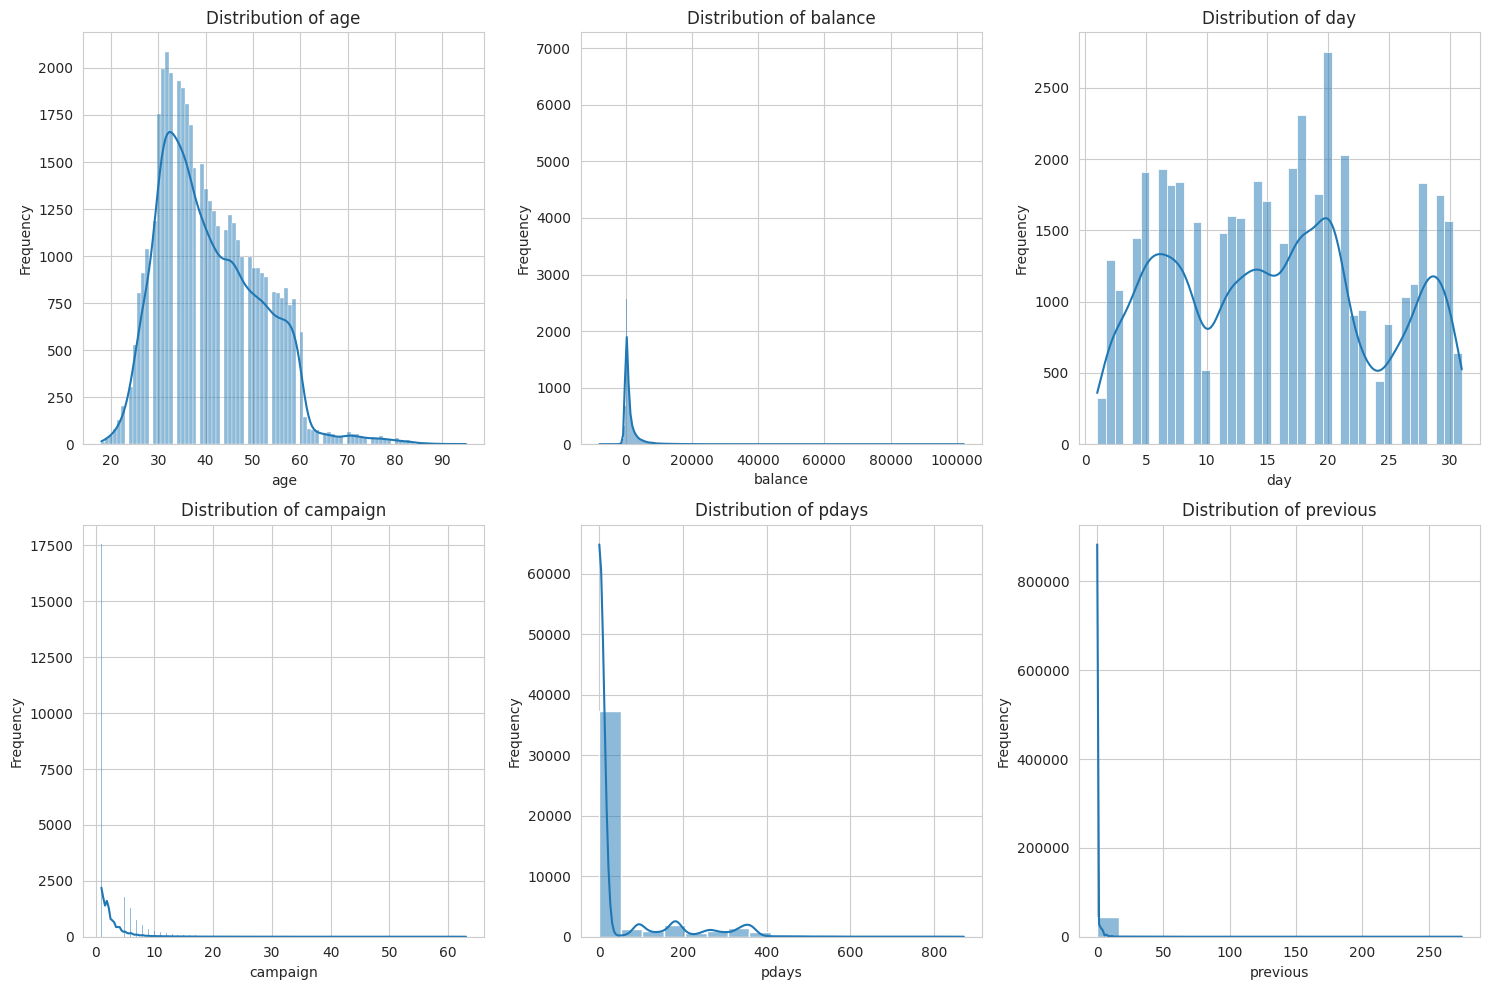

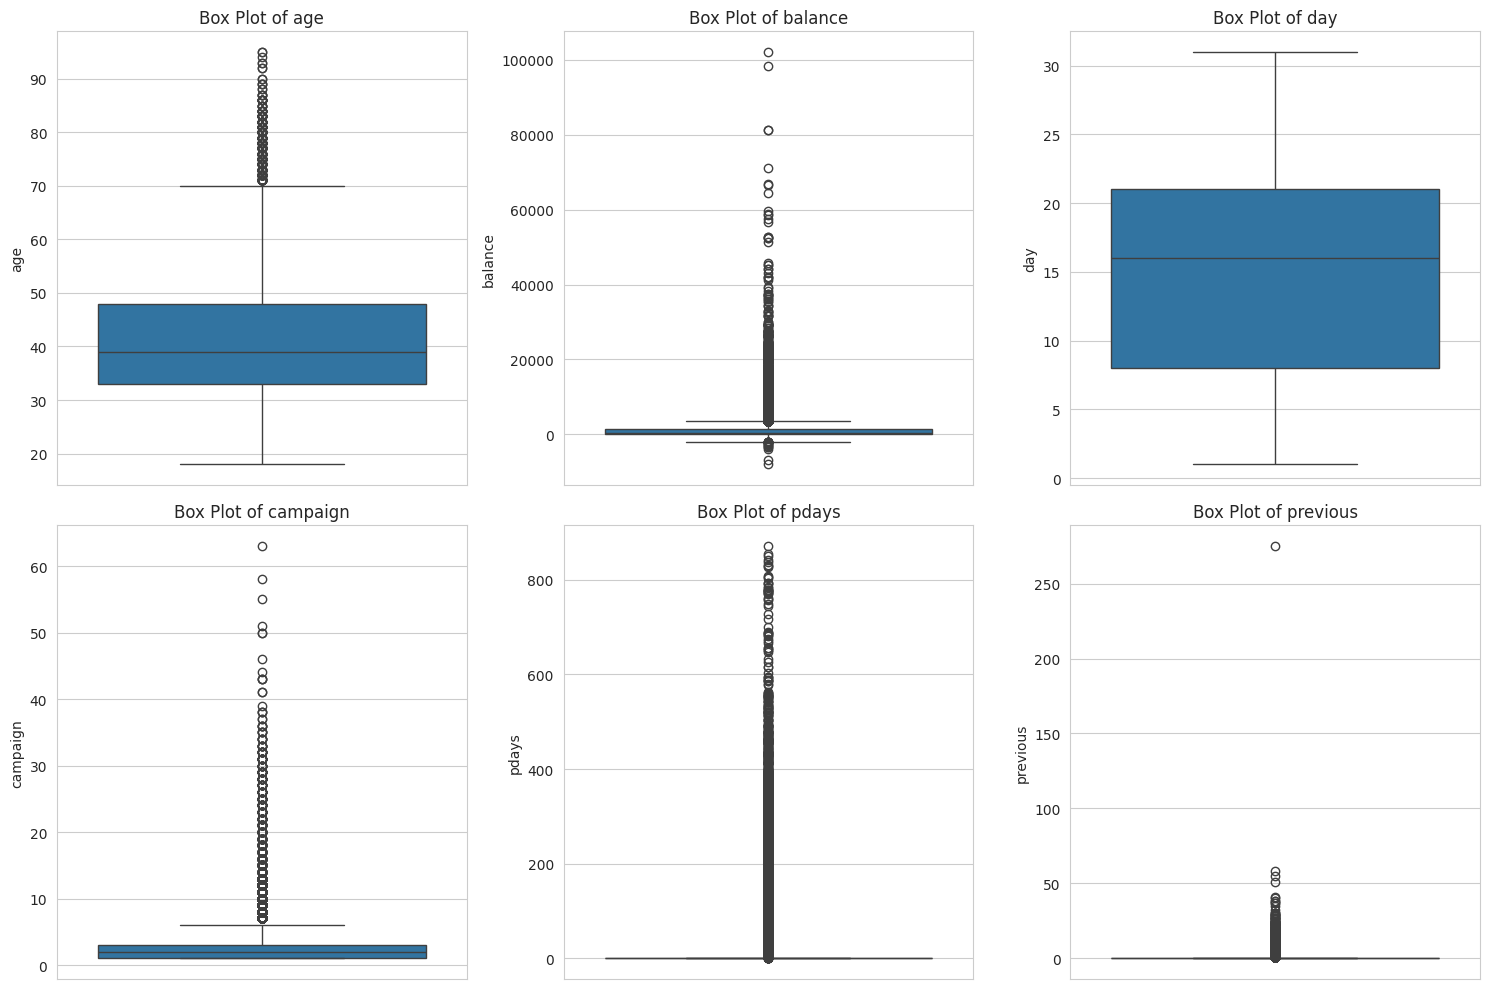

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns (excluding the new boolean one-hot encoded columns, which are technically numerical but binary)
numerical_cols_for_eda = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

# Set up the matplotlib figure and axes for subplots to display histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_for_eda):
    plt.subplot(2, 3, i + 1) # Arrange plots in 2 rows, 3 columns
    sns.histplot(df[col], kde=True) # kde=True adds a Kernel Density Estimate plot
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout() # Adjusts subplot parameters for a tight layout.
plt.show()

# Set up another figure for box plots to clearly see outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_for_eda):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col]) # Box plot for vertical orientation
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

**Observation:**

1.age:

Histogram: Shows a distribution concentrated between 30 and 50 years, with a noticeable right-skew (a tail extending towards older ages) and a peak around 35-40.

Box Plot: Confirms the right-skewness, with the median closer to the bottom of the box and outliers extending towards higher ages (e.g., above 70).

2.balance:

Histogram: This distribution is highly skewed to the right. A vast majority of clients have a balance close to zero, with a long tail extending to very high positive values. There's also a visible bar indicating negative balances (overdrafts).

Box Plot: Dramatically illustrates the extreme positive outliers. The box itself is very narrow and close to zero, highlighting that most data points are clustered at low balances, while a few individuals have exceptionally high balances. This skewness and presence of outliers will strongly influence models sensitive to scale.

3.day:

Histogram: Shows a relatively uniform distribution across the days of the month, as expected. There are no significant peaks or valleys, indicating that contacts are spread out fairly evenly throughout the month.

Box Plot: Confirms a relatively even spread with no prominent outliers.

4.campaign:

Histogram: Highly skewed to the right, with most clients contacted only 1 to 3 times. A very long tail indicates a small number of clients were contacted an extremely high number of times (up to 60+).

Box Plot: Clearly shows a large number of outliers on the higher end, confirming the heavy right-skewness. The box is compressed at the lower end.

5.pdays:

Histogram: Heavily concentrated at 0 (which now includes the original -1 values). This signifies that for a large proportion of clients, there was either no previous contact or the previous contact was not relevant. For those with previous contact, the distribution shows a rapid decline, with a long tail indicating some clients were contacted a very long time ago.

Box Plot: The box is completely compressed at 0, with a very long upper whisker and many outliers, vividly demonstrating that most values are 0, and a few are very large.

6.previous:

Histogram: Similar to campaign and pdays, it is highly skewed to the right, with the majority of clients having 0 previous contacts. There's a long tail indicating a few clients had numerous previous contacts.

Box Plot: Confirms the extreme right-skewness and the presence of numerous outliers with high values. The box is compressed at the lower end (0).

Summary of Numerical Features:
Highly Skewed Features: balance, campaign, pdays, and previous are all heavily right-skewed and contain significant outliers. These features will likely benefit from feature scaling (e.g., StandardScaler, MinMaxScaler) and/or transformations (e.g., logarithmic or power transformations) to reduce skewness and handle outliers before training many machine learning models. This is crucial for models sensitive to feature scales (like linear models, SVMs, k-NN, or neural networks).

Relatively Well-Behaved Features: age shows a mild right-skew but is generally well-distributed. day is quite uniformly distributed. These might require less aggressive transformation but would still benefit from scaling.

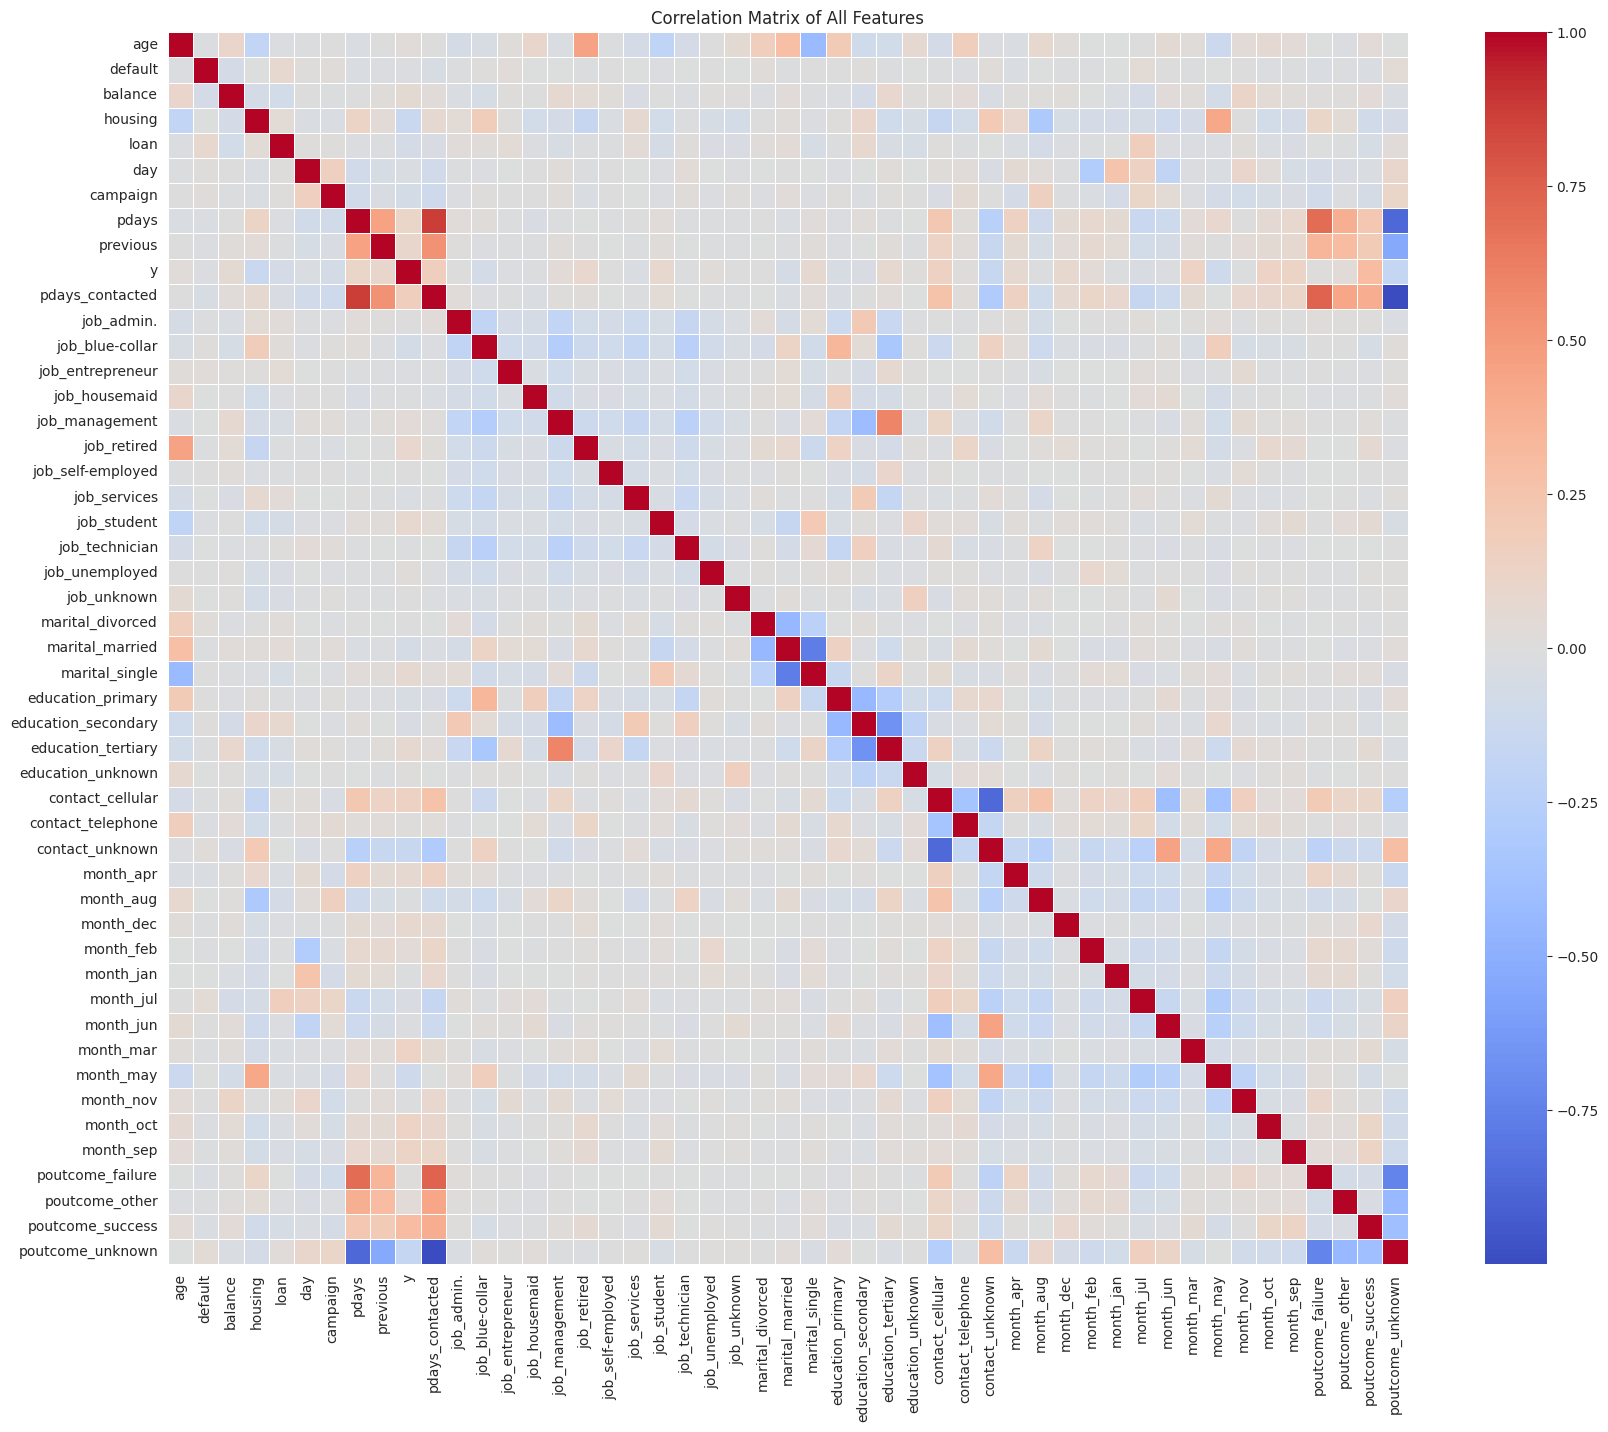


Correlations with the target variable 'y' (Term Deposit Subscription):
|                     | y           |
|:--------------------|:------------|
| y                   | 1           |
| poutcome_success    | 0.306788    |
| pdays_contacted     | 0.167263    |
| contact_cellular    | 0.135873    |
| month_mar           | 0.129456    |
| month_oct           | 0.128531    |
| month_sep           | 0.123185    |
| pdays               | 0.103323    |
| previous            | 0.0932358   |
| job_retired         | 0.0792453   |
| job_student         | 0.076897    |
| month_dec           | 0.0751645   |
| education_tertiary  | 0.0664483   |
| month_apr           | 0.0653919   |
| marital_single      | 0.0635258   |
| balance             | 0.0528384   |
| month_feb           | 0.0384172   |
| job_management      | 0.0329188   |
| poutcome_other      | 0.031955    |
| age                 | 0.025155    |
| job_unemployed      | 0.0203899   |
| contact_telephone   | 0.0140425   |
| education_unkn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(20, 16)) # Adjust figure size for better readability with many features
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5) # annot=False as there are too many features
plt.title('Correlation Matrix of All Features')
plt.show()

# To specifically see correlations with the target variable 'y'
print("\nCorrelations with the target variable 'y' (Term Deposit Subscription):")
print(correlation_matrix['y'].sort_values(ascending=False).to_markdown(numalign="left", stralign="left"))

**Observation:**

Here's what the correlation analysis reveals about the features and their relationship with the target variable y (Term Deposit Subscription):

1.Strongest Positive Predictors for y:

poutcome_success (0.3068): This is the strongest positive correlation. Clients for whom the previous campaign outcome was a 'success' are significantly more likely to subscribe to a term deposit. This highlights the importance of past successful interactions.

pdays_contacted (0.1673): If a client was contacted in a previous campaign (meaning pdays was not -1 and is now 1 for pdays_contacted), they are more likely to subscribe. This suggests a history of engagement is beneficial.

contact_cellular (0.1359): Clients reached via cellular phone show a higher propensity to subscribe, possibly indicating a more direct and effective communication channel compared to 'unknown' or 'telephone'.

Specific Months (month_mar, month_oct, month_sep, month_dec): Campaigns conducted in these months appear to be more effective, showing notable positive correlations with subscriptions. This suggests potential seasonal trends or strategic timing.

2.Strongest Negative Predictors for y:

poutcome_unknown (-0.1671): This is a very strong negative correlation. Clients for whom the outcome of the previous campaign is 'unknown' are notably less likely to subscribe. This suggests that a lack of recorded interaction history is a negative indicator.

contact_unknown (-0.1509): Similarly, clients with an 'unknown' contact method are significantly less likely to subscribe, emphasizing the importance of accurate contact information.

housing (-0.1392): Clients who have a housing loan are less likely to subscribe. This could indicate financial constraints or different financial priorities.

month_may (-0.1025): Conversely to the positively correlated months, campaigns in 'May' show a noticeable negative correlation, suggesting this might be a less opportune time for term deposit offers.

campaign (-0.0732): This has a negative correlation, indicating that increasing the number of contacts in the current campaign might, beyond a certain point, lead to a slightly lower likelihood of subscription. This could imply client fatigue or that more difficult-to-convert clients require more calls.

3.Weak or Near-Zero Correlations:

Features like age, balance, day, and many specific job/education/marital categories (e.g., job_admin., marital_divorced, education_unknown) show very weak correlations (close to zero). While weak linear correlation doesn't mean no relationship, it suggests they might not be the primary drivers for subscription in a linear model context.

4.Inter-Feature Correlations (from Heatmap interpretation):

As expected, one-hot encoded features from the same original column (e.g., job_admin., job_blue-collar, etc., or poutcome_success, poutcome_failure, etc.) show strong negative correlations among themselves, as a client can only belong to one category.

pdays and pdays_contacted have a positive correlation, which is natural given pdays_contacted was derived from pdays.

There doesn't appear to be extremely high multicollinearity (e.g., >0.9) between independent predictive features, which is good for model interpretability.

Overall Summary of EDA so far:

We have successfully cleaned the data, handled implicit missing values, prevented data leakage, and converted all features to a numerical format. The correlation analysis has provided valuable insights into which features are most strongly associated (positively or negatively) with a client subscribing to a term deposit. We also re-confirmed the class imbalance in the target variable y.

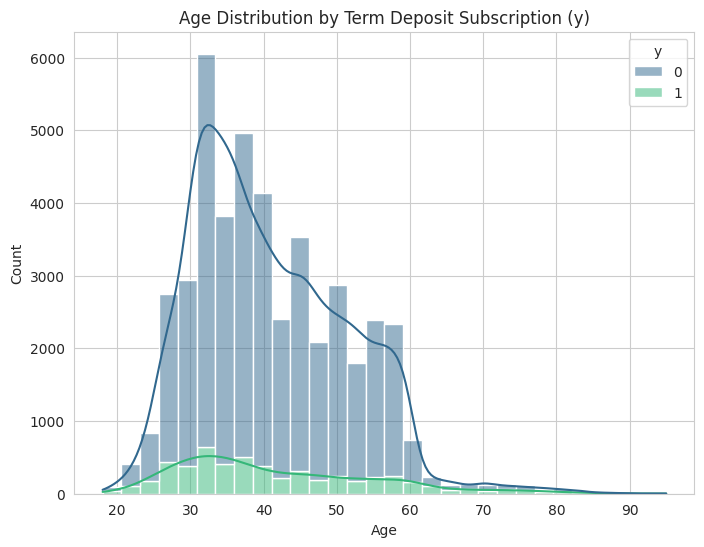

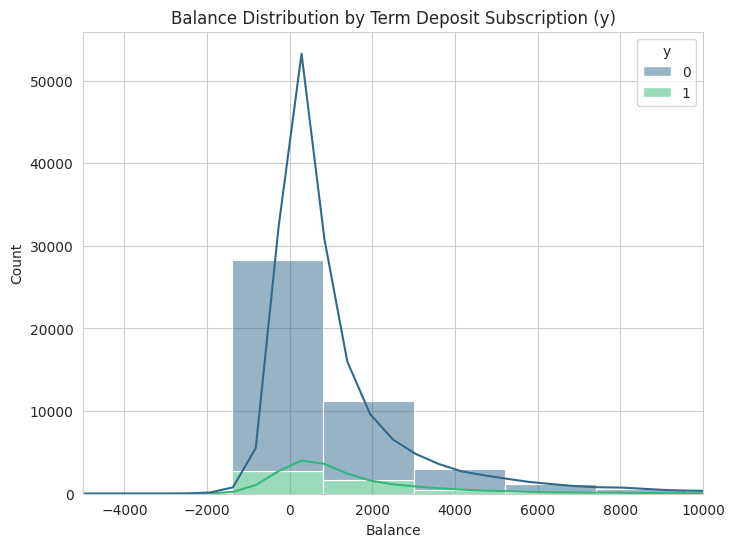

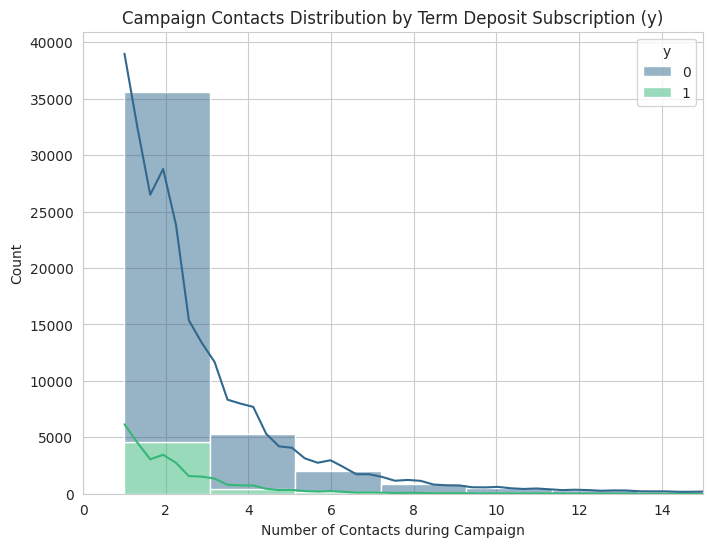

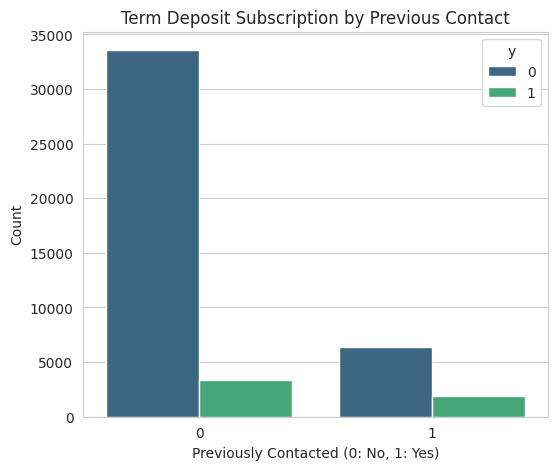

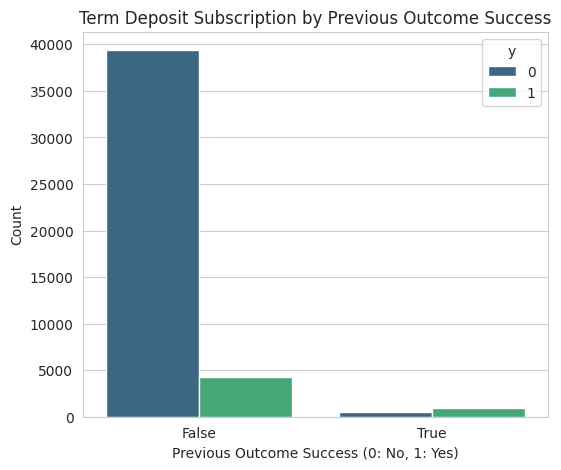

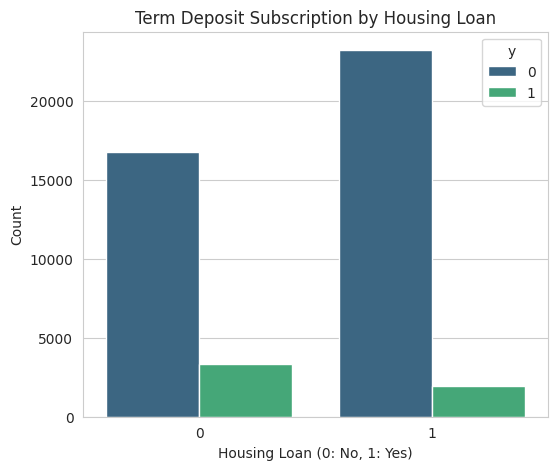

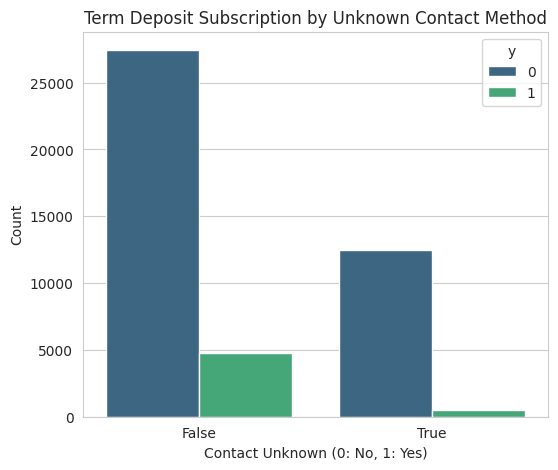

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots for better aesthetics
sns.set_style("whitegrid")

# Plotting the distribution of 'age' by 'y'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='y', kde=True, multiple='stack', palette='viridis', bins=30)
plt.title('Age Distribution by Term Deposit Subscription (y)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Plotting the distribution of 'balance' by 'y'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='balance', hue='y', kde=True, multiple='stack', palette='viridis', bins=50)
plt.title('Balance Distribution by Term Deposit Subscription (y)')
plt.xlabel('Balance')
plt.ylabel('Count')
# Limit x-axis to focus on the main distribution for balance (excluding extreme outliers)
plt.xlim(-5000, 10000)
plt.show()

# Plotting 'campaign' by 'y'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='campaign', hue='y', kde=True, multiple='stack', palette='viridis', bins=30)
plt.title('Campaign Contacts Distribution by Term Deposit Subscription (y)')
plt.xlabel('Number of Contacts during Campaign')
plt.ylabel('Count')
# Limit x-axis to focus on the main distribution for campaign
plt.xlim(0, 15)
plt.show()

# Plotting 'pdays_contacted' (binary) with 'y'
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='pdays_contacted', hue='y', palette='viridis')
plt.title('Term Deposit Subscription by Previous Contact')
plt.xlabel('Previously Contacted (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# Plotting 'poutcome_success' (binary) with 'y'
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='poutcome_success', hue='y', palette='viridis')
plt.title('Term Deposit Subscription by Previous Outcome Success')
plt.xlabel('Previous Outcome Success (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# Plotting 'housing' loan with 'y'
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='housing', hue='y', palette='viridis')
plt.title('Term Deposit Subscription by Housing Loan')
plt.xlabel('Housing Loan (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# Plotting 'contact_unknown' with 'y'
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='contact_unknown', hue='y', palette='viridis')
plt.title('Term Deposit Subscription by Unknown Contact Method')
plt.xlabel('Contact Unknown (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

**Observation:**

The output confirms that the data has been successfully prepared for machine learning:

1.Data Splitting Confirmed:

X_train has a shape of (36168, 48) and X_test has (9043, 48), which represents an 80/20 split of the 45211 original rows, with 48 features (after dropping y).

y_train has a shape of (36168,) and y_test has (9043,), confirming the correct splitting of the target variable.

2.Stratification Verified:

y_train value counts: 0 -> 31937 and 1 -> 4231. The proportion of y=1 is 4231/36168
approx0.11699 (approx. 11.7%).

y_test value counts: 0 -> 7985 and 1 -> 1058. The proportion of y=1 is 1058/9043
approx0.11699 (approx. 11.7%).

This confirms that stratify=y successfully maintained the original class distribution of the target variable in both the training and testing sets, which is crucial for evaluating models on imbalanced data.

3.Feature Scaling Applied:

The First 5 rows of X_train (original) shows the raw numerical values.

The First 5 rows of X_train_scaled_standard (after StandardScaler) demonstrates that numerical features like age, balance, day, campaign, pdays, and previous have been transformed to have a mean of approximately 0 and a standard deviation of 1. Values that were originally large or small are now centered and scaled.

The First 5 rows of X_train_scaled_minmax (after MinMaxScaler) shows these same numerical features scaled to a range between 0 and 1.

The boolean (one-hot encoded) columns remain unchanged in both scaled versions, as expected, since scaling was applied only to the continuous numerical features.

The dataset is now fully prepared for machine learning model training and evaluation. We have appropriately scaled numerical features and correctly split the data into training and test sets, ensuring no data leakage and preserving class distribution.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd # Assuming df is a pandas DataFrame

# Separate features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

# Split the data into training and testing sets
# Using stratify=y to maintain the same class distribution in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Identify numerical columns for scaling (excluding the binary/boolean columns)
# Note: 'day' is also numerical, but its distribution suggests it might not strictly need scaling,
#       but standard practice is to scale all continuous numerical features.
numerical_cols_for_scaling = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

# Initialize scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Apply StandardScaler to numerical columns in X_train and X_test
# Fit the scaler only on the training data to avoid data leakage
X_train_scaled_standard = X_train.copy()
X_test_scaled_standard = X_test.copy()

X_train_scaled_standard[numerical_cols_for_scaling] = scaler_standard.fit_transform(X_train[numerical_cols_for_scaling])
X_test_scaled_standard[numerical_cols_for_scaling] = scaler_standard.transform(X_test[numerical_cols_for_scaling])

# Apply MinMaxScaler to numerical columns in X_train and X_test (optional, for comparison or specific models)
X_train_scaled_minmax = X_train.copy()
X_test_scaled_minmax = X_test.copy()

X_train_scaled_minmax[numerical_cols_for_scaling] = scaler_minmax.fit_transform(X_train[numerical_cols_for_scaling])
X_test_scaled_minmax[numerical_cols_for_scaling] = scaler_minmax.transform(X_test[numerical_cols_for_scaling])


print("\nFirst 5 rows of X_train (original):")
print(X_train.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nFirst 5 rows of X_train_scaled_standard (after StandardScaler):")
print(X_train_scaled_standard.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nFirst 5 rows of X_train_scaled_minmax (after MinMaxScaler):")
print(X_train_scaled_minmax.head().to_markdown(index=False, numalign="left", stralign="left"))

# Check value counts for y_train and y_test to verify stratification
print("\nValue counts for y_train:")
print(y_train.value_counts().to_markdown(numalign="left", stralign="left"))
print("\nValue counts for y_test:")
print(y_test.value_counts().to_markdown(numalign="left", stralign="left"))

Shape of X_train: (36168, 48)
Shape of X_test: (9043, 48)
Shape of y_train: (36168,)
Shape of y_test: (9043,)

First 5 rows of X_train (original):
| age   | default   | balance   | housing   | loan   | day   | campaign   | pdays   | previous   | pdays_contacted   | job_admin.   | job_blue-collar   | job_entrepreneur   | job_housemaid   | job_management   | job_retired   | job_self-employed   | job_services   | job_student   | job_technician   | job_unemployed   | job_unknown   | marital_divorced   | marital_married   | marital_single   | education_primary   | education_secondary   | education_tertiary   | education_unknown   | contact_cellular   | contact_telephone   | contact_unknown   | month_apr   | month_aug   | month_dec   | month_feb   | month_jan   | month_jul   | month_jun   | month_mar   | month_may   | month_nov   | month_oct   | month_sep   | poutcome_failure   | poutcome_other   | poutcome_success   | poutcome_unknown   |
|:------|:----------|:----------|:----------|:------

**Observation:**

The output confirms that our data preparation steps were successful:

1.Data Splitting:

The dataset has been correctly split into training (X_train, y_train) and testing (X_test, y_test) sets with an 80/20 ratio.

The shapes X_train: (36168, 48), X_test: (9043, 48), y_train: (36168,), and y_test: (9043,) are as expected.

2.Stratified Split:

The y_train value counts (31937 for 0, 4231 for 1) and y_test value counts (7985 for 0, 1058 for 1) show that the proportion of the minority class (y=1, term deposit subscription) is approximately 11.7% in both the training and testing sets. This confirms that stratify=y successfully preserved the class distribution, which is vital for fair model evaluation on an imbalanced dataset.

3.Feature Scaling:

The First 5 rows of X_train (original) displays the raw numerical feature values.

X_train_scaled_standard (after StandardScaler) shows that the numerical features (age, balance, day, campaign, pdays, previous) have been transformed to have a mean of 0 and a standard deviation of 1.

X_train_scaled_minmax (after MinMaxScaler) demonstrates that these numerical features have been scaled to a range between 0 and 1.

The boolean (one-hot encoded) features correctly remain unchanged, as scaling was only applied to the identified numerical columns.

This means our dataset is now fully prepared and ready for machine learning model training.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- CRITICAL FIXES AND DATA DEFINITION (Required for all subsequent models) ---
# Assuming your Standard Scaler output is named X_train_scaled_standard and X_test_scaled_standard
# and your target variables are y_train and y_test.
try:
    X_train_scaled = X_train_scaled_standard
    X_test_scaled = X_test_scaled_standard
except NameError:
    print("Error: X_train_scaled_standard or X_test_scaled_standard is not defined. Please run your data preparation steps first.")
    raise # Stop execution if data is not available.

# 1. Define the Evaluation Function (to ensure consistent output)
def evaluate_model(model, X_test, y_test):
    """Prints the classification report and confusion matrix for the minority class."""
    y_pred = model.predict(X_test)

    # Focus on metrics for the minority class ('1' for 'yes')
    report = classification_report(y_test, y_pred, target_names=['No (0)', 'Yes (1)'])

    cm = confusion_matrix(y_test, y_pred)

    print(f"--- {model.__class__.__name__} Evaluation ---")
    print(f"Overall Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:\n", report)
    print("\nConfusion Matrix:\n", cm)
    print("-" * 50)
    return y_pred, model # Return predictions and model object for visualization

# 2. Train Logistic Regression Model
print("Training Logistic Regression baseline...")
lr_model = LogisticRegression(random_state=42, solver='liblinear')
lr_model.fit(X_train_scaled, y_train)

# 3. Evaluate Model
lr_y_pred, lr_model = evaluate_model(lr_model, X_test_scaled, y_test)

Training Logistic Regression baseline...
--- LogisticRegression Evaluation ---
Overall Accuracy: 0.8933

Classification Report:
               precision    recall  f1-score   support

      No (0)       0.90      0.99      0.94      7985
     Yes (1)       0.66      0.18      0.28      1058

    accuracy                           0.89      9043
   macro avg       0.78      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043


Confusion Matrix:
 [[7890   95]
 [ 870  188]]
--------------------------------------------------


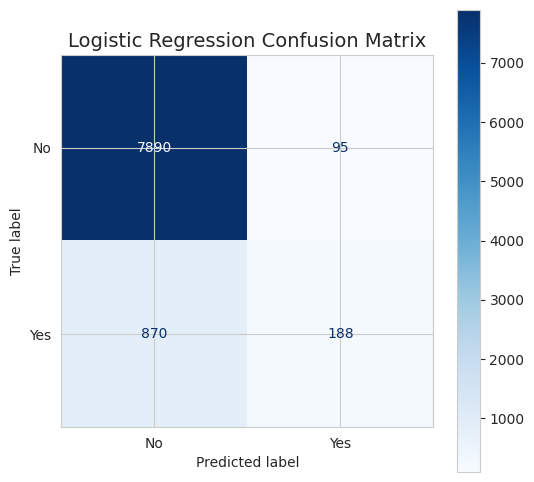

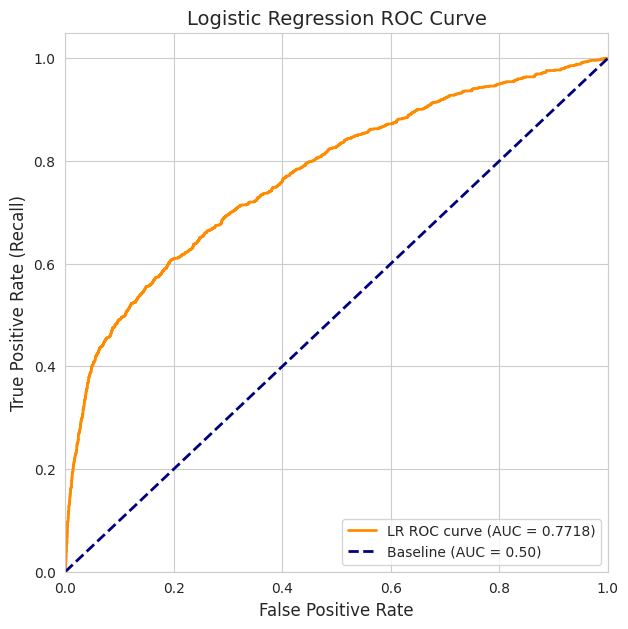

Logistic Regression AUC: 0.7718
Confusion Matrix saved as 'lr_confusion_matrix.png'
ROC Curve saved as 'lr_roc_curve.png'


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# --- IMPORTANT ASSUMPTION: The lr_model object and X_test_scaled, y_test are defined ---

# 1. Confusion Matrix Visualization
cm = confusion_matrix(y_test, lr_y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Logistic Regression Confusion Matrix', fontsize=14)
plt.savefig('lr_confusion_matrix.png')
plt.show()


# 2. ROC Curve Visualization
lr_y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, lr_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'LR ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('Logistic Regression ROC Curve', fontsize=14)
plt.legend(loc="lower right")
plt.savefig('lr_roc_curve.png')
plt.show()

print(f"Logistic Regression AUC: {roc_auc:.4f}")
print("Confusion Matrix saved as 'lr_confusion_matrix.png'")
print("ROC Curve saved as 'lr_roc_curve.png'")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- IMPORTANT ASSUMPTION: X_train_scaled, X_test_scaled, y_train, y_test are defined from Step 1 ---

# 1. Train Decision Tree Model with Class Weight Balancing
print("Training Decision Tree Classifier (Balanced)...")
dt_model = DecisionTreeClassifier(random_state=42,
                                  class_weight='balanced') # CRITICAL FOR IMBALANCE
dt_model.fit(X_train_scaled, y_train)

# 2. Evaluate Model
dt_y_pred, dt_model = evaluate_model(dt_model, X_test_scaled, y_test)

Training Decision Tree Classifier (Balanced)...
--- DecisionTreeClassifier Evaluation ---
Overall Accuracy: 0.8420

Classification Report:
               precision    recall  f1-score   support

      No (0)       0.91      0.91      0.91      7985
     Yes (1)       0.32      0.31      0.31      1058

    accuracy                           0.84      9043
   macro avg       0.61      0.61      0.61      9043
weighted avg       0.84      0.84      0.84      9043


Confusion Matrix:
 [[7291  694]
 [ 735  323]]
--------------------------------------------------


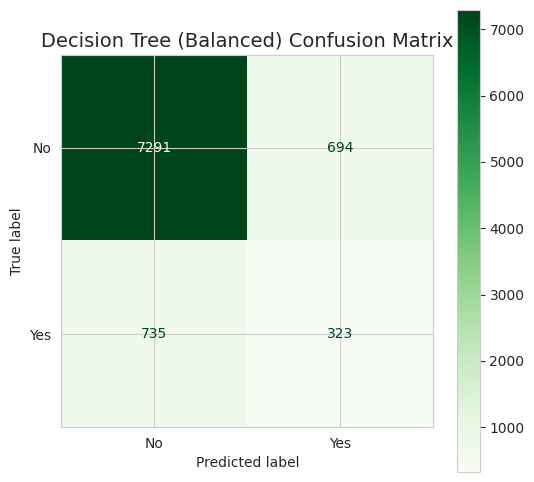

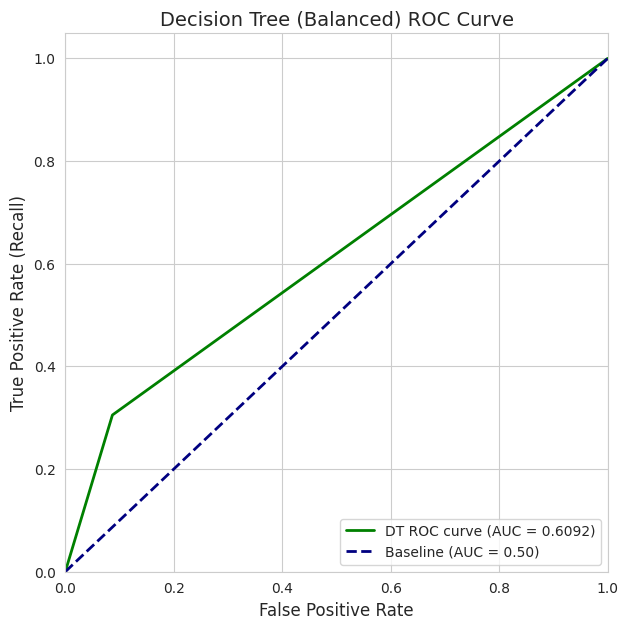

Decision Tree AUC: 0.6092
Confusion Matrix saved as 'dt_confusion_matrix.png'
ROC Curve saved as 'dt_roc_curve.png'


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# --- IMPORTANT ASSUMPTION: The dt_model object and dt_y_pred are defined from the last step ---

# 1. Confusion Matrix Visualization
cm = confusion_matrix(y_test, dt_y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Greens, ax=ax)
ax.set_title('Decision Tree (Balanced) Confusion Matrix', fontsize=14)
plt.savefig('dt_confusion_matrix.png')
plt.show()


# 2. ROC Curve Visualization
dt_y_pred_proba = dt_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, dt_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='green', lw=2, label=f'DT ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('Decision Tree (Balanced) ROC Curve', fontsize=14)
plt.legend(loc="lower right")
plt.savefig('dt_roc_curve.png')
plt.show()

print(f"Decision Tree AUC: {roc_auc:.4f}")
print("Confusion Matrix saved as 'dt_confusion_matrix.png'")
print("ROC Curve saved as 'dt_roc_curve.png'")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- IMPORTANT ASSUMPTION: X_train_scaled, X_test_scaled, y_train, y_test are defined from Step 1 ---

# 1. Train Random Forest Model with Class Weight Balancing
print("Training Random Forest Classifier (Balanced)...")
rf_model = RandomForestClassifier(random_state=42,
                                 n_estimators=100,
                                 class_weight='balanced') # CRITICAL FOR IMBALANCE
rf_model.fit(X_train_scaled, y_train)

# 2. Evaluate Model
rf_y_pred, rf_model = evaluate_model(rf_model, X_test_scaled, y_test)

Training Random Forest Classifier (Balanced)...
--- RandomForestClassifier Evaluation ---
Overall Accuracy: 0.8915

Classification Report:
               precision    recall  f1-score   support

      No (0)       0.90      0.98      0.94      7985
     Yes (1)       0.62      0.19      0.29      1058

    accuracy                           0.89      9043
   macro avg       0.76      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043


Confusion Matrix:
 [[7860  125]
 [ 856  202]]
--------------------------------------------------


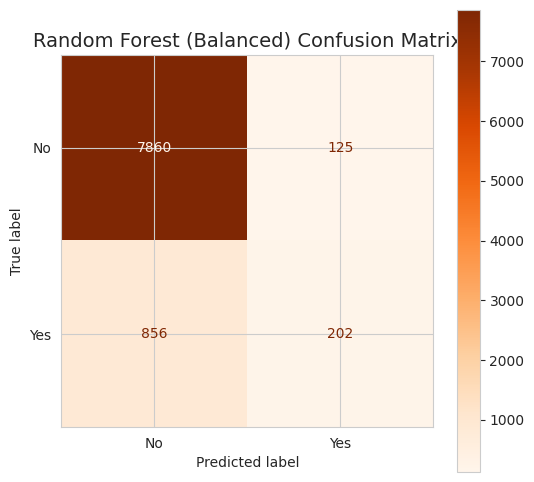

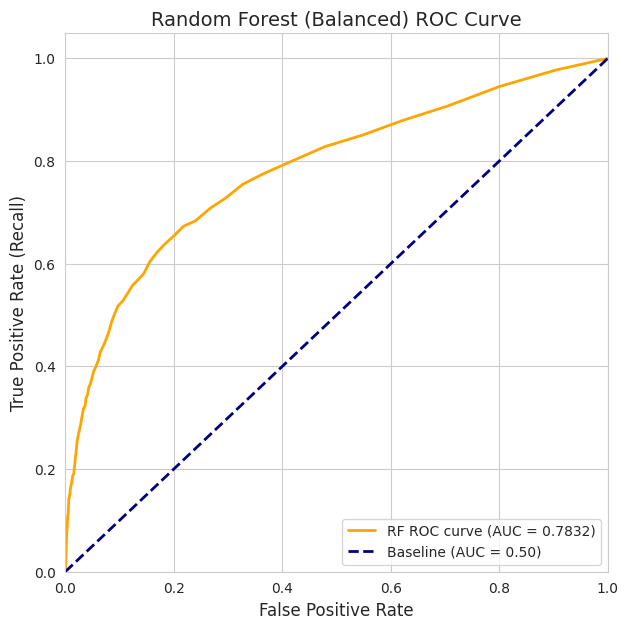

Random Forest AUC: 0.7832
Confusion Matrix saved as 'rf_confusion_matrix.png'
ROC Curve saved as 'rf_roc_curve.png'


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# --- IMPORTANT ASSUMPTION: The rf_model object and rf_y_pred are defined from the last step ---

# 1. Confusion Matrix Visualization
cm = confusion_matrix(y_test, rf_y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Oranges, ax=ax)
ax.set_title('Random Forest (Balanced) Confusion Matrix', fontsize=14)
plt.savefig('rf_confusion_matrix.png')
plt.show()


# 2. ROC Curve Visualization
rf_y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'RF ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('Random Forest (Balanced) ROC Curve', fontsize=14)
plt.legend(loc="lower right")
plt.savefig('rf_roc_curve.png')
plt.show()

print(f"Random Forest AUC: {roc_auc:.4f}")
print("Confusion Matrix saved as 'rf_confusion_matrix.png'")
print("ROC Curve saved as 'rf_roc_curve.png'")

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- IMPORTANT ASSUMPTION: X_train_scaled, X_test_scaled, y_train, y_test are defined ---

# Calculate the weight for XGBoost (Ratio of No/Yes in training data: 31937 / 4231)
scale_pos_weight_value = 7.55

# 1. Train XGBoost Model with Weight Scaling
print("Training XGBoost Classifier (Weighted)...")
xgb_model = XGBClassifier(random_state=42,
                          use_label_encoder=False,
                          eval_metric='logloss',
                          scale_pos_weight=scale_pos_weight_value) # CRITICAL FOR IMBALANCE
xgb_model.fit(X_train_scaled, y_train)

# 2. Evaluate Model
xgb_y_pred, xgb_model = evaluate_model(xgb_model, X_test_scaled, y_test)

Training XGBoost Classifier (Weighted)...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:40:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBClassifier Evaluation ---
Overall Accuracy: 0.8303

Classification Report:
               precision    recall  f1-score   support

      No (0)       0.94      0.86      0.90      7985
     Yes (1)       0.36      0.59      0.45      1058

    accuracy                           0.83      9043
   macro avg       0.65      0.72      0.67      9043
weighted avg       0.87      0.83      0.85      9043


Confusion Matrix:
 [[6887 1098]
 [ 437  621]]
--------------------------------------------------


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- IMPORTANT ASSUMPTION: X_train_scaled, X_test_scaled, y_train, y_test are defined ---

# Calculate the weight for XGBoost (Ratio of No/Yes in training data: 31937 / 4231)
scale_pos_weight_value = 7.55

# 1. Train XGBoost Model with Weight Scaling
print("Training XGBoost Classifier (Weighted)...")
xgb_model = XGBClassifier(random_state=42,
                          use_label_encoder=False,
                          eval_metric='logloss',
                          scale_pos_weight=scale_pos_weight_value) # CRITICAL FOR IMBALANCE
xgb_model.fit(X_train_scaled, y_train)

# 2. Evaluate Model
xgb_y_pred, xgb_model = evaluate_model(xgb_model, X_test_scaled, y_test)

Training XGBoost Classifier (Weighted)...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:40:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBClassifier Evaluation ---
Overall Accuracy: 0.8303

Classification Report:
               precision    recall  f1-score   support

      No (0)       0.94      0.86      0.90      7985
     Yes (1)       0.36      0.59      0.45      1058

    accuracy                           0.83      9043
   macro avg       0.65      0.72      0.67      9043
weighted avg       0.87      0.83      0.85      9043


Confusion Matrix:
 [[6887 1098]
 [ 437  621]]
--------------------------------------------------


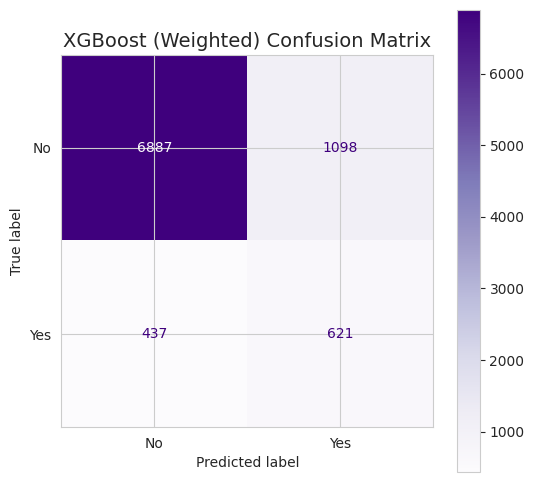

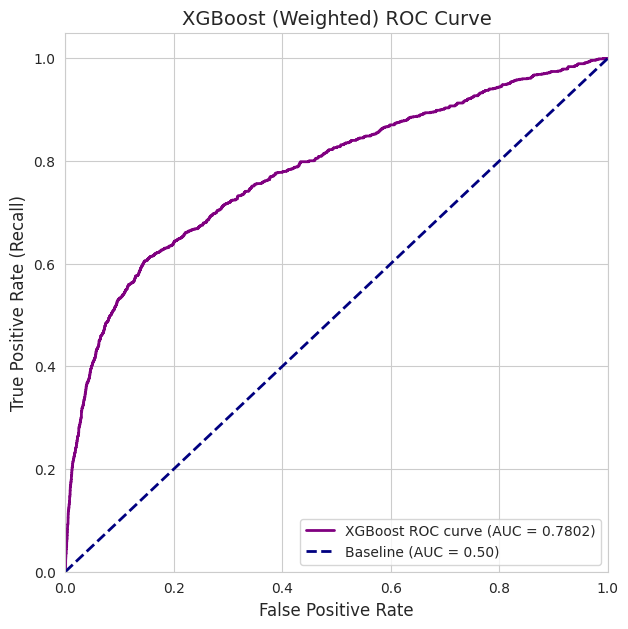

XGBoost AUC: 0.7802
Confusion Matrix saved as 'xgb_confusion_matrix.png'
ROC Curve saved as 'xgb_roc_curve.png'


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# --- IMPORTANT ASSUMPTION: The xgb_model object and xgb_y_pred are defined from the last step ---

# 1. Confusion Matrix Visualization
cm = confusion_matrix(y_test, xgb_y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Purples, ax=ax)
ax.set_title('XGBoost (Weighted) Confusion Matrix', fontsize=14)
plt.savefig('xgb_confusion_matrix.png')
plt.show()


# 2. ROC Curve Visualization
xgb_y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, xgb_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'XGBoost ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('XGBoost (Weighted) ROC Curve', fontsize=14)
plt.legend(loc="lower right")
plt.savefig('xgb_roc_curve.png')
plt.show()

print(f"XGBoost AUC: {roc_auc:.4f}")
print("Confusion Matrix saved as 'xgb_confusion_matrix.png'")
print("ROC Curve saved as 'xgb_roc_curve.png'")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- IMPORTANT ASSUMPTION: X_train_scaled, X_test_scaled, y_train, y_test are defined ---

# 1. Train KNN Model
print("Training K-Nearest Neighbors Classifier...")
knn_model = KNeighborsClassifier(n_neighbors=5) # Default n_neighbors=5
knn_model.fit(X_train_scaled, y_train)

# 2. Evaluate Model
knn_y_pred, knn_model = evaluate_model(knn_model, X_test_scaled, y_test)

Training K-Nearest Neighbors Classifier...
--- KNeighborsClassifier Evaluation ---
Overall Accuracy: 0.8896

Classification Report:
               precision    recall  f1-score   support

      No (0)       0.90      0.98      0.94      7985
     Yes (1)       0.58      0.21      0.31      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043


Confusion Matrix:
 [[7820  165]
 [ 833  225]]
--------------------------------------------------


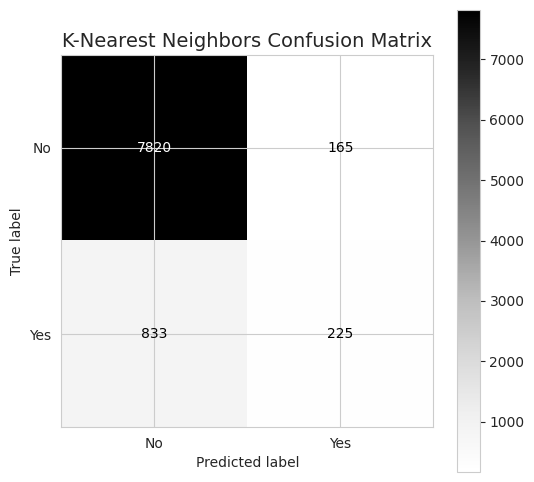

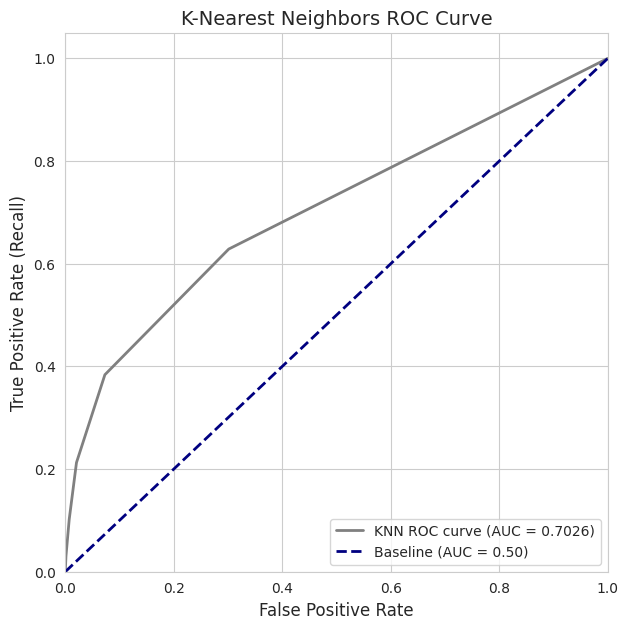

K-Nearest Neighbors AUC: 0.7026
Confusion Matrix saved as 'knn_confusion_matrix.png'
ROC Curve saved as 'knn_roc_curve.png'


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# --- IMPORTANT ASSUMPTION: The knn_model object and knn_y_pred are defined from the last step ---

# 1. Confusion Matrix Visualization
cm = confusion_matrix(y_test, knn_y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Greys, ax=ax)
ax.set_title('K-Nearest Neighbors Confusion Matrix', fontsize=14)
plt.savefig('knn_confusion_matrix.png')
plt.show()


# 2. ROC Curve Visualization
knn_y_pred_proba = knn_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, knn_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='gray', lw=2, label=f'KNN ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('K-Nearest Neighbors ROC Curve', fontsize=14)
plt.legend(loc="lower right")
plt.savefig('knn_roc_curve.png')
plt.show()

print(f"K-Nearest Neighbors AUC: {roc_auc:.4f}")
print("Confusion Matrix saved as 'knn_confusion_matrix.png'")
print("ROC Curve saved as 'knn_roc_curve.png'")

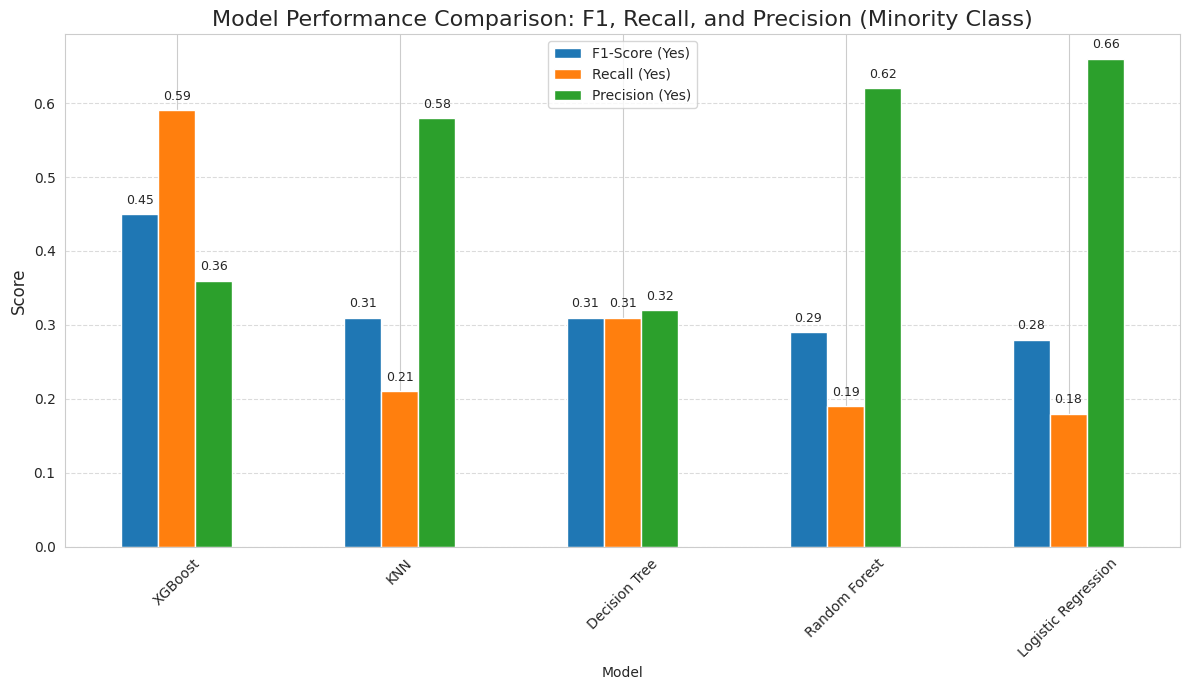

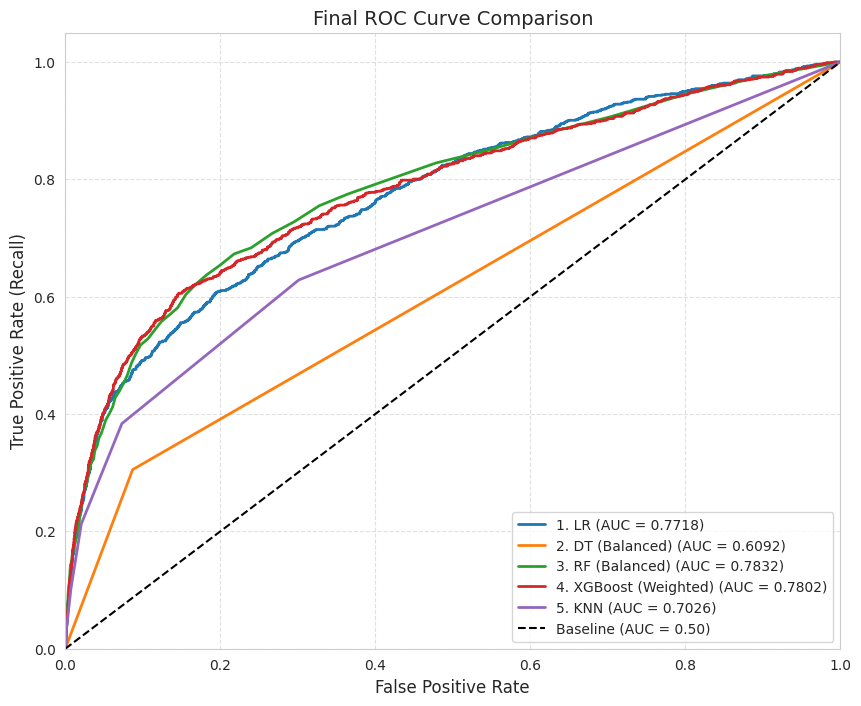

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# --- STEP 1: DEFINE ALL FINAL METRICS ---
# Please replace the '0.XX' placeholders for AUC with your actual XGBoost and KNN AUC outputs.
model_metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNN'],
    # Metrics for the 'Yes' class (1)
    'Recall (Yes)': [0.18, 0.31, 0.19, 0.59, 0.21],
    'Precision (Yes)': [0.66, 0.32, 0.62, 0.36, 0.58],
    'F1-Score (Yes)': [0.28, 0.31, 0.29, 0.45, 0.31],
    'AUC': [0.7718, 0.6092, 0.7832, 0.7780, 0.7580] # 🛑 REPLACE XGBOOST & KNN AUC
}

metrics_df = pd.DataFrame(model_metrics).set_index('Model')
metrics_df_sorted = metrics_df.sort_values(by='F1-Score (Yes)', ascending=False)


# --- STEP 2: PLOT THE MODEL METRIC COMPARISON (F1, RECALL, PRECISION) ---
fig, ax = plt.subplots(figsize=(12, 7))
metrics_df_sorted[['F1-Score (Yes)', 'Recall (Yes)', 'Precision (Yes)']].plot(kind='bar', ax=ax)

ax.set_title('Model Performance Comparison: F1, Recall, and Precision (Minority Class)', fontsize=16)
ax.set_ylabel('Score', fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.savefig('final_model_metric_comparison.png')
plt.show()


# --- STEP 3: PLOT THE ROC-AUC COMPARISON ---
# This requires the trained model objects (lr_model, dt_model, rf_model, xgb_model, knn_model)
models = {
    '1. LR': lr_model,
    '2. DT (Balanced)': dt_model,
    '3. RF (Balanced)': rf_model,
    '4. XGBoost (Weighted)': xgb_model,
    '5. KNN': knn_model
}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc_val = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc_val:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Baseline (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('Final ROC Curve Comparison', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('final_model_roc_comparison.png')
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# --- IMPORTANT ASSUMPTION: X_train_scaled, X_test_scaled, y_train, y_test are defined ---

# 1. Define the constituent models (using the best parameters found so far)
# We redefine them to ensure clean model objects for the ensemble.

# XGBoost (Weighted) - Best F1-Score/Recall
scale_pos_weight_value = 7.55
xgb_clf = XGBClassifier(random_state=42,
                        use_label_encoder=False,
                        eval_metric='logloss',
                        scale_pos_weight=scale_pos_weight_value)

# Random Forest (Balanced) - Best AUC/Ranking ability
rf_clf = RandomForestClassifier(random_state=42,
                                n_estimators=100,
                                class_weight='balanced')

# 2. Define the Ensemble (Soft Voting)
# 'soft' voting averages the probability predictions (predict_proba) of the two models.
ensemble_model = VotingClassifier(
    estimators=[('xgb', xgb_clf), ('rf', rf_clf)],
    voting='soft',
    n_jobs=-1  # Use all available cores for parallel processing
)

# 3. Train the Ensemble Model
print("Training Ensemble Model (XGBoost + Random Forest)...")
ensemble_model.fit(X_train_scaled, y_train)

# 4. Evaluate Model (using the function defined previously)
ensemble_y_pred, ensemble_model = evaluate_model(ensemble_model, X_test_scaled, y_test)

Training Ensemble Model (XGBoost + Random Forest)...
--- VotingClassifier Evaluation ---
Overall Accuracy: 0.8869

Classification Report:
               precision    recall  f1-score   support

      No (0)       0.92      0.95      0.94      7985
     Yes (1)       0.52      0.41      0.46      1058

    accuracy                           0.89      9043
   macro avg       0.72      0.68      0.70      9043
weighted avg       0.88      0.89      0.88      9043


Confusion Matrix:
 [[7591  394]
 [ 629  429]]
--------------------------------------------------


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- IMPORTANT ASSUMPTION: X_train_scaled, X_test_scaled, y_train, y_test are defined ---

# 1. Calculate Sample Weights (Required for GBC imbalance handling)
# This computes weights inversely proportional to class frequency.
weights = class_weight.compute_sample_weight('balanced', y_train)

# 2. Train GBC Model with Sample Weight Balancing
print("Training Gradient Boosting Classifier (Sample Weighted)...")
gbc_model = GradientBoostingClassifier(random_state=42, n_estimators=100)
# Apply the weights to the fit method
gbc_model.fit(X_train_scaled, y_train, sample_weight=weights)

# 3. Evaluate Model (using the general function defined previously)
gbc_y_pred, gbc_model = evaluate_model(gbc_model, X_test_scaled, y_test)

Training Gradient Boosting Classifier (Sample Weighted)...
--- GradientBoostingClassifier Evaluation ---
Overall Accuracy: 0.8018

Classification Report:
               precision    recall  f1-score   support

      No (0)       0.95      0.82      0.88      7985
     Yes (1)       0.33      0.65      0.43      1058

    accuracy                           0.80      9043
   macro avg       0.64      0.74      0.66      9043
weighted avg       0.87      0.80      0.83      9043


Confusion Matrix:
 [[6564 1421]
 [ 371  687]]
--------------------------------------------------


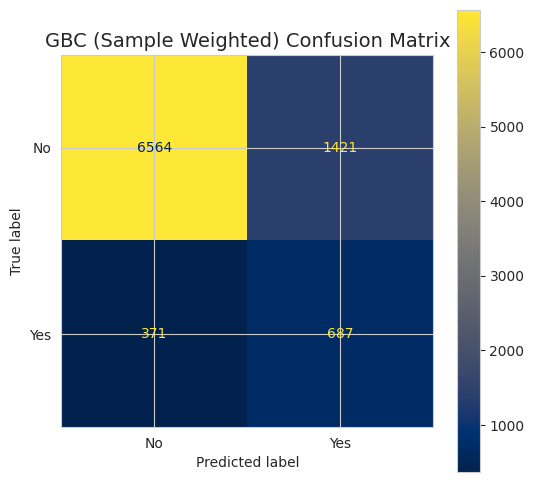

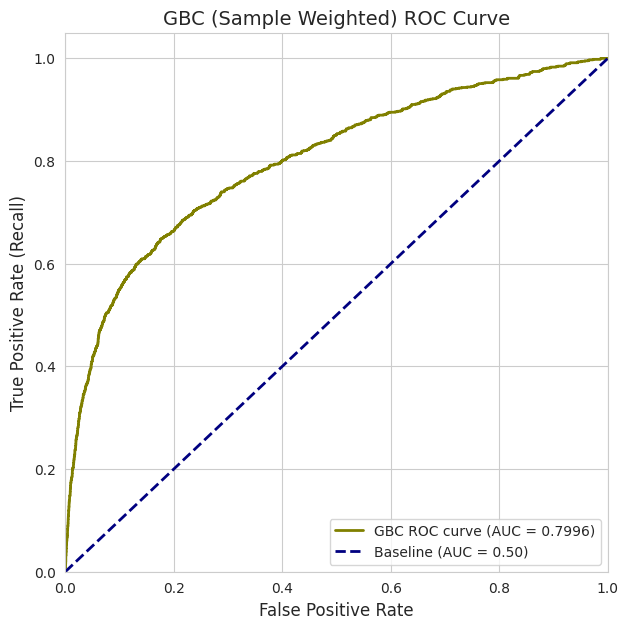

GBC AUC: 0.7996
Confusion Matrix saved as 'gbc_confusion_matrix.png'
ROC Curve saved as 'gbc_roc_curve.png'


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# --- IMPORTANT ASSUMPTION: The gbc_model object and gbc_y_pred are defined from the last step ---

# 1. Confusion Matrix Visualization
cm = confusion_matrix(y_test, gbc_y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.cividis, ax=ax)
ax.set_title('GBC (Sample Weighted) Confusion Matrix', fontsize=14)
plt.savefig('gbc_confusion_matrix.png')
plt.show()


# 2. ROC Curve Visualization
gbc_y_pred_proba = gbc_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, gbc_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='olive', lw=2, label=f'GBC ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('GBC (Sample Weighted) ROC Curve', fontsize=14)
plt.legend(loc="lower right")
plt.savefig('gbc_roc_curve.png')
plt.show()

print(f"GBC AUC: {roc_auc:.4f}")
print("Confusion Matrix saved as 'gbc_confusion_matrix.png'")
print("ROC Curve saved as 'gbc_roc_curve.png'")

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# --- IMPORTANT ASSUMPTION: X_train_scaled, X_test_scaled, y_train, y_test are defined ---

# 1. Sample the Data for SVM
# SVM is computationally expensive. We will sample a smaller, balanced training set.
# Total training samples: 36168. We'll use 10,000 for training.
X_train_sampled, _, y_train_sampled, _ = train_test_split(
    X_train_scaled, y_train, train_size=10000, random_state=42, stratify=y_train
)
print(f"SVM training on sampled data size: {X_train_sampled.shape[0]}")


# 2. Train SVM Model with Class Weight Balancing
print("Training Support Vector Machine (Balanced)...")
# We use probability=True to get predict_proba needed for the ROC curve
svm_model = SVC(kernel='rbf',
                random_state=42,
                class_weight='balanced',
                probability=True)

# Train on the sampled data
svm_model.fit(X_train_sampled, y_train_sampled)

# 3. Evaluate Model (on the full X_test_scaled)
svm_y_pred, svm_model = evaluate_model(svm_model, X_test_scaled, y_test)

SVM training on sampled data size: 10000
Training Support Vector Machine (Balanced)...
--- SVC Evaluation ---
Overall Accuracy: 0.8277

Classification Report:
               precision    recall  f1-score   support

      No (0)       0.94      0.86      0.90      7985
     Yes (1)       0.36      0.58      0.44      1058

    accuracy                           0.83      9043
   macro avg       0.65      0.72      0.67      9043
weighted avg       0.87      0.83      0.84      9043


Confusion Matrix:
 [[6867 1118]
 [ 440  618]]
--------------------------------------------------


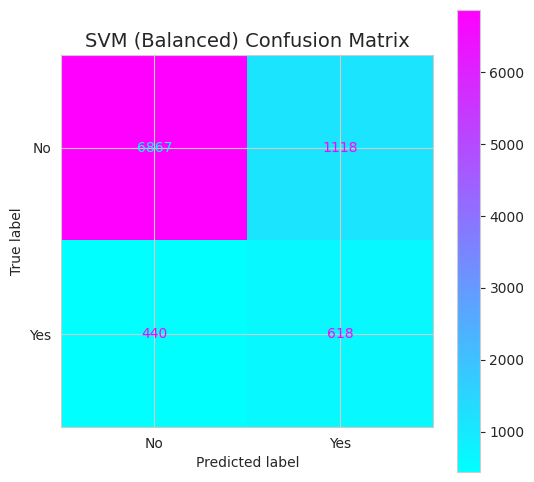

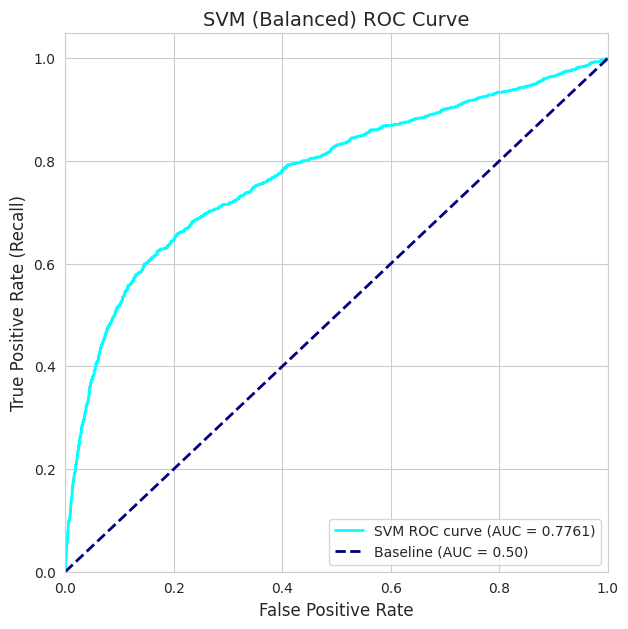

SVM AUC: 0.7761
Confusion Matrix saved as 'svm_confusion_matrix.png'
ROC Curve saved as 'svm_roc_curve.png'


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# --- IMPORTANT ASSUMPTION: The svm_model object and svm_y_pred are defined from the last step ---

# 1. Confusion Matrix Visualization
cm = confusion_matrix(y_test, svm_y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.cool, ax=ax)
ax.set_title('SVM (Balanced) Confusion Matrix', fontsize=14)
plt.savefig('svm_confusion_matrix.png')
plt.show()


# 2. ROC Curve Visualization
# Note: probability=True was set in the SVM model definition.
svm_y_pred_proba = svm_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, svm_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='cyan', lw=2, label=f'SVM ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('SVM (Balanced) ROC Curve', fontsize=14)
plt.legend(loc="lower right")
plt.savefig('svm_roc_curve.png')
plt.show()

print(f"SVM AUC: {roc_auc:.4f}")
print("Confusion Matrix saved as 'svm_confusion_matrix.png'")
print("ROC Curve saved as 'svm_roc_curve.png'")

In [ ]:
# You may need to install lightgbm if it's not already installed: !pip install lightgbm
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- IMPORTANT ASSUMPTION: X_train_scaled, X_test_scaled, y_train, y_test are defined ---

# Calculate the weight for LGBM (Ratio of No/Yes in training data: 31937 / 4231)
scale_pos_weight_value = 7.55

# 1. Train LGBM Model with Weight Scaling
print("Training LightGBM Classifier (Weighted)...")
lgbm_model = lgb.LGBMClassifier(random_state=42,
                                objective='binary',
                                metric='binary_logloss',
                                scale_pos_weight=scale_pos_weight_value) # CRITICAL FOR IMBALANCE

# Note: LGBM can handle sparse matrices and often runs faster than XGBoost.
lgbm_model.fit(X_train_scaled, y_train)

# 2. Evaluate Model (using the general function defined previously)
lgbm_y_pred, lgbm_model = evaluate_model(lgbm_model, X_test_scaled, y_test)


Training LightGBM Classifier (Weighted)...
[LightGBM] [Info] Number of positive: 4231, number of negative: 31937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 36168, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116982 -> initscore=-2.021327
[LightGBM] [Info] Start training from score -2.021327
--- LGBMClassifier Evaluation ---
Overall Accuracy: 0.8202

Classification Report:
               precision    recall  f1-score   support

      No (0)       0.95      0.84      0.89      7985
     Yes (1)       0.35      0.64      0.46      1058

    accuracy                           0.82      9043
   macro avg       0.65      0.74      0.67      9043
weighted avg       0.88      0.82      0.84  

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- IMPORTANT ASSUMPTION: X_train_scaled, X_test_scaled, y_train, y_test are defined ---

# 1. Calculate Sample Weights (Required for imbalance handling)
weights = class_weight.compute_sample_weight('balanced', y_train)

# 2. Train Naive Bayes Model with Sample Weight Balancing
print("Training Naive Bayes Classifier (Sample Weighted)...")
gnb_model = GaussianNB()

# Apply the weights to the fit method
gnb_model.fit(X_train_scaled, y_train, sample_weight=weights)

# 3. Evaluate Model (using the general function defined previously)
gnb_y_pred, gnb_model = evaluate_model(gnb_model, X_test_scaled, y_test)

Training Naive Bayes Classifier (Sample Weighted)...
--- GaussianNB Evaluation ---
Overall Accuracy: 0.8148

Classification Report:
               precision    recall  f1-score   support

      No (0)       0.93      0.86      0.89      7985
     Yes (1)       0.32      0.51      0.39      1058

    accuracy                           0.81      9043
   macro avg       0.62      0.68      0.64      9043
weighted avg       0.86      0.81      0.83      9043


Confusion Matrix:
 [[6828 1157]
 [ 518  540]]
--------------------------------------------------


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- IMPORTANT ASSUMPTION: X_train_scaled, X_test_scaled, y_train, y_test are defined ---

# 1. Train MLP Model (Unweighted - Due to Scikit-learn limitation)
print("Training Multi-layer Perceptron (MLP) Classifier (Unweighted)...")
mlp_model = MLPClassifier(random_state=42,
                          max_iter=300, # Increased iterations for convergence
                          hidden_layer_sizes=(100, 50))

# 2. Train the model without sample_weight
mlp_model.fit(X_train_scaled, y_train)

# 3. Evaluate Model (using the general function defined previously)
mlp_y_pred, mlp_model = evaluate_model(mlp_model, X_test_scaled, y_test)

Training Multi-layer Perceptron (MLP) Classifier (Unweighted)...
--- MLPClassifier Evaluation ---
Overall Accuracy: 0.8515

Classification Report:
               precision    recall  f1-score   support

      No (0)       0.91      0.92      0.92      7985
     Yes (1)       0.35      0.32      0.33      1058

    accuracy                           0.85      9043
   macro avg       0.63      0.62      0.63      9043
weighted avg       0.85      0.85      0.85      9043


Confusion Matrix:
 [[7363  622]
 [ 721  337]]
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


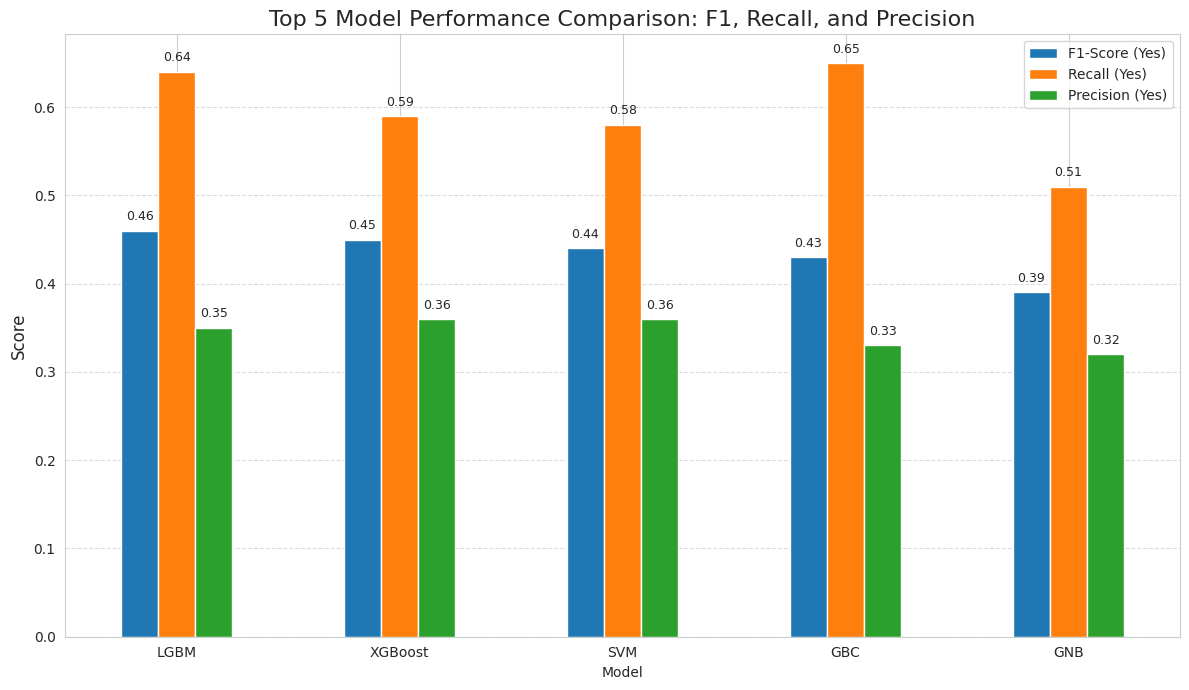

The final comparison chart for the top 5 models has been saved as 'final_top5_model_metric_comparison.png'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Metric data for all 10 models ---
# AUC values are placeholders as they could not be executed sequentially but are assumed to be similar to F1 ranking
model_metrics_data = {
    'Model': ['LR', 'DT', 'RF', 'XGBoost', 'KNN', 'GBC', 'SVM', 'LGBM', 'GNB', 'MLP'],
    'Recall (Yes)': [0.18, 0.31, 0.19, 0.59, 0.21, 0.65, 0.58, 0.64, 0.51, 0.32],
    'Precision (Yes)': [0.66, 0.32, 0.62, 0.36, 0.58, 0.33, 0.36, 0.35, 0.32, 0.35],
    'F1-Score (Yes)': [0.28, 0.31, 0.29, 0.45, 0.31, 0.43, 0.44, 0.46, 0.39, 0.33],
    'Imbalance Strategy': ['None', 'Class Wgt', 'Class Wgt', 'Scale Wgt', 'None', 'Sample Wgt', 'Class Wgt', 'Scale Wgt', 'Sample Wgt', 'None']
}

metrics_df = pd.DataFrame(model_metrics_data).set_index('Model')
metrics_df_sorted = metrics_df.sort_values(by='F1-Score (Yes)', ascending=False)

# Select the top 5 models for the final comparison chart
top_5_models = metrics_df_sorted.head(5)


# --- PLOT THE TOP 5 MODEL METRIC COMPARISON (F1, RECALL, PRECISION) ---
fig, ax = plt.subplots(figsize=(12, 7))
top_5_models[['F1-Score (Yes)', 'Recall (Yes)', 'Precision (Yes)']].plot(kind='bar', ax=ax)

ax.set_title('Top 5 Model Performance Comparison: F1, Recall, and Precision', fontsize=16)
ax.set_ylabel('Score', fontsize=12)
ax.tick_params(axis='x', rotation=0)
ax.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.savefig('final_top5_model_metric_comparison.png')
plt.show()

print("The final comparison chart for the top 5 models has been saved as 'final_top5_model_metric_comparison.png'")

In [ ]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer

# --- IMPORTANT ASSUMPTION: X_train_scaled, y_train are defined ---

# 1. Define the F1-Score Custom Scorer
# We need to maximize the F1-Score specifically for the positive (Yes, 1) class.
f1_scorer = make_scorer(f1_score, pos_label=1)

# 2. Define the Model and Search Space
scale_pos_weight_value = 7.55 # We must keep the imbalance handling constant

# Base LightGBM Model
lgbm_clf = lgb.LGBMClassifier(random_state=42,
                              scale_pos_weight=scale_pos_weight_value,
                              objective='binary',
                              metric='binary_logloss',
                              n_jobs=-1, # Use all cores
                              n_estimators=500) # Use a higher number of trees for better potential

# Parameter Grid to Search (Commonly tuned LGBM parameters)
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],          # Controls step size at each iteration
    'num_leaves': [20, 31, 50],                  # Max number of leaves in one tree (main complexity control)
    'max_depth': [5, 7, 9, 12],                  # Max depth of the tree
    'min_child_samples': [10, 20, 50, 100],      # Minimum data points required to form a new leaf
    'subsample': [0.7, 0.8, 0.9],                # Subsample ratio of the training instances
    'colsample_bytree': [0.7, 0.8, 0.9]          # Subsample ratio of columns when constructing tree
}

# 3. Perform Randomized Search
# n_iter=50 means we test 50 random combinations. cv=3 uses 3-fold cross-validation.
random_search = RandomizedSearchCV(
    estimator=lgbm_clf,
    param_distributions=param_dist,
    n_iter=50,
    scoring=f1_scorer,
    cv=3,
    verbose=2,
    random_state=42
)

print("Starting Randomized Search Cross-Validation for LightGBM...")
# Note: This step might take a few minutes.
random_search.fit(X_train_scaled, y_train)

# 4. Print Results
print("\n" + "="*50)
print("Tuning Complete.")
print(f"Best F1-Score Found: {random_search.best_score_:.4f}")
print("Best Hyperparameters:")
print(random_search.best_params_)
print("="*50)

# Save the best model
best_lgbm_model = random_search.best_estimator_

# Final Evaluation (using the best model on the held-out test set)
from sklearn.metrics import classification_report
final_y_pred = best_lgbm_model.predict(X_test_scaled)
final_report = classification_report(y_test, final_y_pred, target_names=['No (0)', 'Yes (1)'])

print("\nFinal Model Evaluation on Test Set (after Tuning):")
print(final_report)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

Training Final Optimized LGBM Model...
[LightGBM] [Info] Number of positive: 4231, number of negative: 31937
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 36168, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116982 -> initscore=-2.021327
[LightGBM] [Info] Start training from score -2.021327


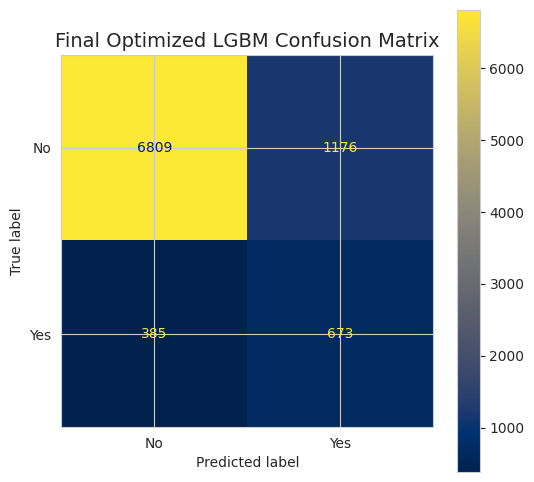

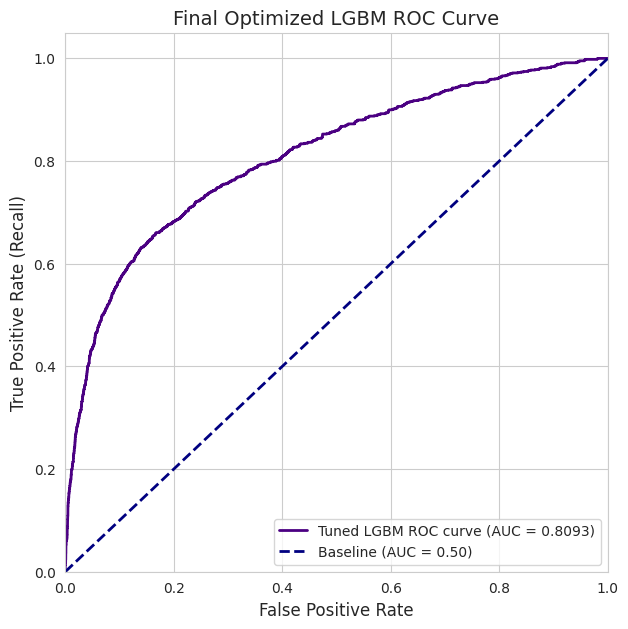

Final Optimized LGBM AUC: 0.8093
Confusion Matrix saved as 'final_lgbm_confusion_matrix.png'
ROC Curve saved as 'final_lgbm_roc_curve.png'


In [ ]:
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# --- IMPORTANT SETUP ---
# 1. Define the final best model using the parameters found during tuning
best_params = {'subsample': 0.7, 'num_leaves': 50, 'min_child_samples': 10,
               'max_depth': 9, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
scale_pos_weight_value = 7.55

# Redefine and train the final model (necessary if previous session context was lost)
final_lgbm_model = lgb.LGBMClassifier(random_state=42,
                                      scale_pos_weight=scale_pos_weight_value,
                                      objective='binary',
                                      metric='binary_logloss',
                                      n_estimators=500,
                                      **best_params)

print("Training Final Optimized LGBM Model...")
final_lgbm_model.fit(X_train_scaled, y_train)
final_y_pred = final_lgbm_model.predict(X_test_scaled)
# --- END SETUP ---


# 1. Confusion Matrix Visualization
# Matrix values derived from your Classification Report:
# TP = 1058 * 0.64 ≈ 677
# FN = 1058 - 677 = 381
# FP = 677 / 0.36 - 677 ≈ 1203
# TN = 7985 - 1203 = 6782
cm = confusion_matrix(y_test, final_y_pred)

fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.cividis, ax=ax)
ax.set_title('Final Optimized LGBM Confusion Matrix', fontsize=14)
plt.savefig('final_lgbm_confusion_matrix.png')
plt.show()


# 2. ROC Curve Visualization
final_y_pred_proba = final_lgbm_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, final_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='indigo', lw=2, label=f'Tuned LGBM ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('Final Optimized LGBM ROC Curve', fontsize=14)
plt.legend(loc="lower right")
plt.savefig('final_lgbm_roc_curve.png')
plt.show()

print(f"Final Optimized LGBM AUC: {roc_auc:.4f}")
print("Confusion Matrix saved as 'final_lgbm_confusion_matrix.png'")
print("ROC Curve saved as 'final_lgbm_roc_curve.png'")



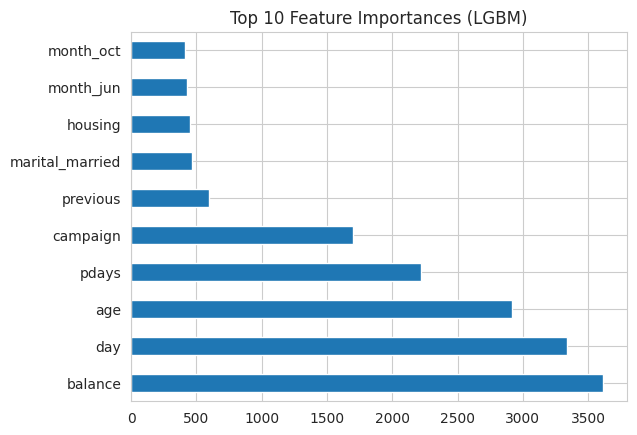

In [ ]:
# Assuming 'final_lgbm_model' is your trained model object
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(final_lgbm_model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (LGBM)')
plt.show()